# **CreditScoreInsight:A Credit Score Classification Model**

**1.INTRODUCTION**

**Problem Statement**

In your role as a data scientist within a global finance corporation, you're tasked with a significant
undertaking. Over the years, the company has amassed a substantial dataset comprising essential
banking details and an extensive repository of credit-related data.
Driven by the need for enhanced efficiency and accuracy, the company's management has initiated
a forward-looking project.

The objective is to develop an intelligent system employing data science
and machine learning to automate the categorization of individuals into specific credit score
brackets.
o create a predictive model that categorizes customers
into three creditworthiness levels: Good, Standard, and Poor. This model will be a valuable tool for
banks and financial institutions to make informed decisions about loan approvals and risk
assessment.

**2.DATA PREPARATION**

**2.1 Import Libraries**

In [1]:
!pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [30]:
# Packages for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from scipy.stats import skew
from scipy.stats import f_oneway
# Packages for Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#Packages for  Modeling and evaluation
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix,classification_report,roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
import lightgbm as lgb



#To ignore future warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
pd.options.mode.copy_on_write = True

**2.2 Loading Files**

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [72]:
#Load the data into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/credit.csv')


In [63]:
data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


**2.3 Data Profiling**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [8]:
# Separate numerical and categorical columns
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Print numerical columns
print("Numerical Columns:")
print(numerical_columns)
# Print categorical columns
print("\nCategorical Columns:")
print(categorical_columns)

Numerical Columns:
['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

Categorical Columns:
['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']


**Dataset Description**

This dataset contains information on 100,000 customers' financial and credit activities. It includes 28 attributes .

**a.Columns**

ID: Unique record identifier.

Customer_ID: Unique identifier for each customer.

Month: Reporting month.

Name: Customer's name.

Age: Customer's age.

SSN: Customer's Social Security Number.

Occupation: Customer's occupation.

Annual_Income: Yearly income.

Monthly_Inhand_Salary: Monthly take-home salary.

Num_Bank_Accounts: Number of bank accounts.

Num_Credit_Card: Number of credit cards.

Interest_Rate: Applicable interest rate.

Num_of_Loan: Number of loans.

Type_of_Loan: Types of loans held.

Delay_from_due_date: Average days payments are delayed.

Num_of_Delayed_Payment: Count of delayed payments.

Changed_Credit_Limit: Change in credit limit.

Num_Credit_Inquiries: Number of credit inquiries.

Credit_Mix: Variety of credit accounts.

Outstanding_Debt: Total debt owed.

Credit_Utilization_Ratio: Ratio of credit used to credit available.

Credit_History_Age: Age of credit history (months).

Payment_of_Min_Amount: Indicates if only minimum payments are made.

Total_EMI_per_month: Total monthly EMI payments.

Amount_invested_monthly: Monthly investments.

Payment_Behaviour: Spending and payment patterns.

Monthly_Balance: End-of-month balance.

Credit_Score: Credit score category (Good, Standard, Poor).

 **b.Types of column**

ID,Customer_ID, 'SSN','Name' -These are unique identifiers.

1. Discrete Columns:
These columns represent distinct, countable values.

'ID', 'Customer_ID', 'Month'

2. Continuous Columns:
These columns represent measurable quantities and can take on any value within a range.

'Age', 'SSN', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'

3. Categorical Columns:
These columns represent categories or groups and are typically non-numeric.

Name,
Occupation,
Type_of_Loan,
Credit_Mix,
Payment_of_Min_Amount,
Payment_Behaviour,
Credit_Score,



**3.EDA**

In [9]:
data.describe()# Summary statistics

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [10]:
data.describe(include='object')

,Name,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,100000,100000,100000,100000,100000,100000,100000
unique,10128,15,6261,3,3,6,3
top,Jessicad,Lawyer,No Data,Standard,Yes,Low_spent_Small_value_payments,Standard
freq,48,7096,11408,45848,52326,28616,53174


In [ ]:
columns_to_convert = ["Occupation", "Type_of_Loan", "Credit_Mix", "Payment_of_Min_Amount", "Payment_Behaviour","Credit_Score"]
data[columns_to_convert] = data[columns_to_convert].astype("category")#to convert from obj to category

**3.1 Univariate Analysis**

**Target column**

In [11]:
# Define color mapping for Credit Score categories
palette= {'Poor': 'red', 'Standard': 'yellow', 'Good': 'green'}

Value counts of Credit Score:
Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64


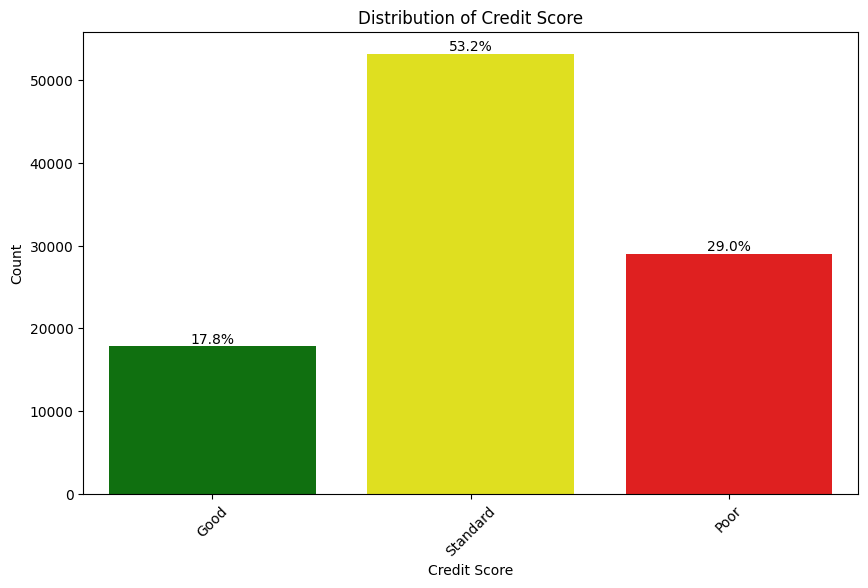

In [12]:
# Map colors to a new column in the data
data['Color'] = data['Credit_Score'].map(palette)

# Display the unique values and their counts in the target column
print("Value counts of Credit Score:")
print(data['Credit_Score'].value_counts())

# 1. Distribution of the Target Column
plt.figure(figsize=(10, 6))

# Calculate value counts and percentages
value_counts = data['Credit_Score'].value_counts()
total = len(data)
percentages = value_counts / total * 100

# Plot using seaborn
ax = sns.countplot(x='Credit_Score', data=data, palette=palette, hue='Credit_Score', legend=False)

# Annotate with percentages
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    percent = height / total * 100
    ax.annotate(f'{percent:.1f}%', (x + width / 2, height), ha='center', va='bottom')

plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Categorical columns**

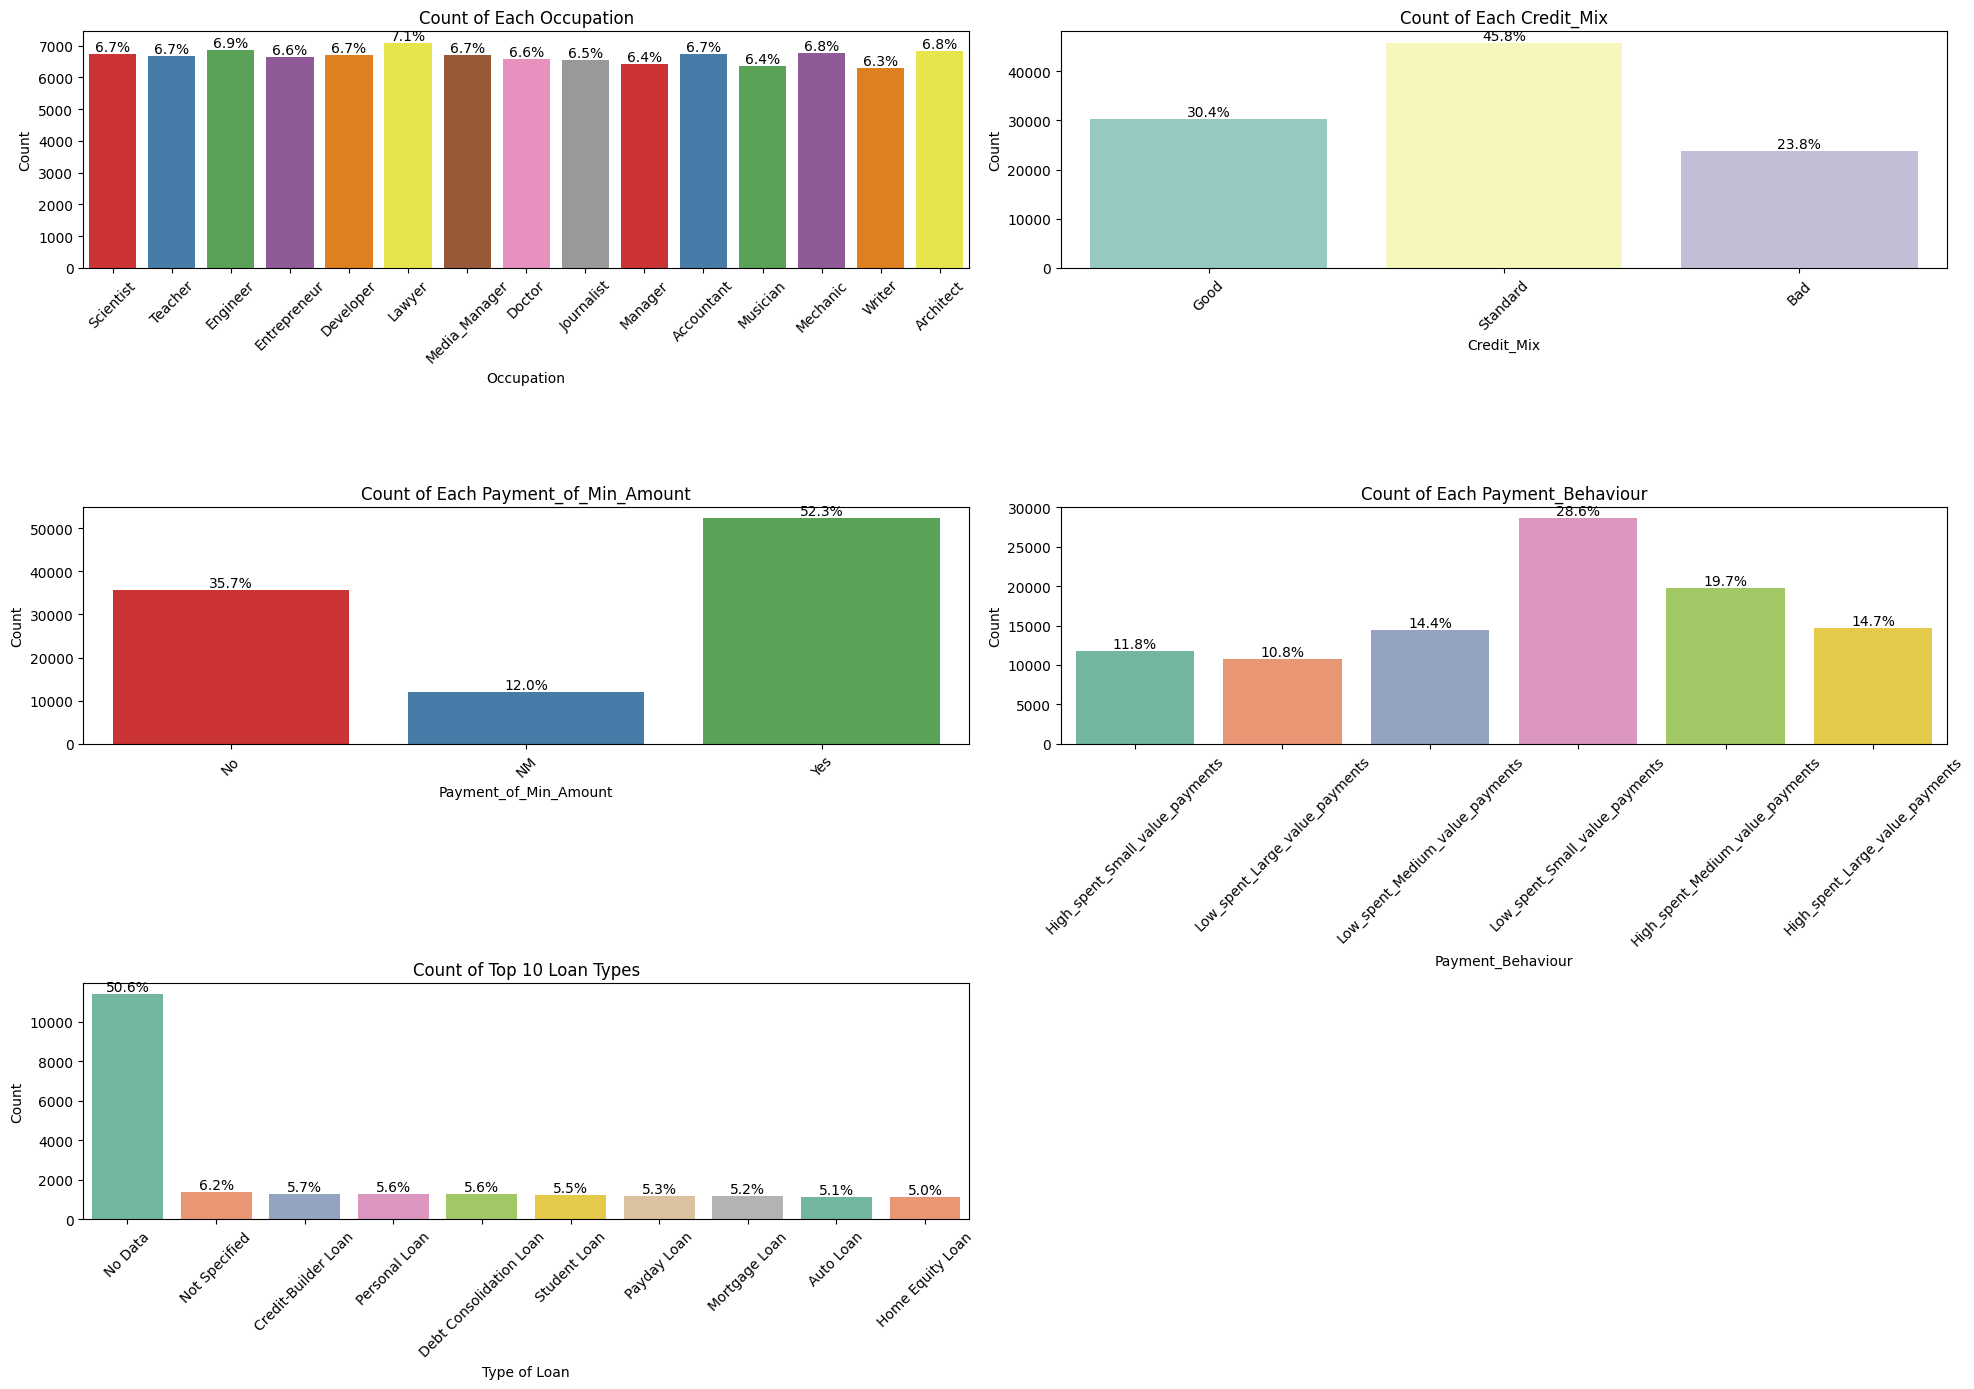

In [13]:
# Define figure size for all plots
figsize = (20, 14)

# List of columns and palettes
columns = [
    ('Occupation', 'Set1'),
    ('Credit_Mix', 'Set3'),
    ('Payment_of_Min_Amount', 'Set1'),
    ('Payment_Behaviour', 'Set2')
]

# Create subplots
plt.figure(figsize=figsize)

for idx, (column, palette) in enumerate(columns, start=1):
    plt.subplot(3, 2, idx)
    ax = sns.countplot(x=column, data=data, palette=palette, dodge=False)

    # Calculate and annotate percentages
    total = len(data)
    for p in ax.patches:
        height = p.get_height()
        width = p.get_width()
        x = p.get_x()
        percent = height / total * 100
        ax.annotate(f'{percent:.1f}%', (x + width / 2, height), ha='center', va='bottom')

    plt.title(f'Count of Each {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

# Calculate value counts for Type_of_Loan and get the top 10
type_of_loan_counts = data['Type_of_Loan'].value_counts().nlargest(10)

# Filter the dataset to include only the top 10 loan types
top_10_loans = type_of_loan_counts.index
filtered_data = data[data['Type_of_Loan'].isin(top_10_loans)]

# Plot count of top 10 loan types
plt.subplot(3, 2, 5)
ax = sns.countplot(x='Type_of_Loan', data=filtered_data, palette='Set2', order=top_10_loans)

# Calculate and annotate percentages
total = len(filtered_data)
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    percent = height / total * 100
    ax.annotate(f'{percent:.1f}%', (x + width / 2, height), ha='center', va='bottom')

plt.title('Count of Top 10 Loan Types')
plt.xlabel('Type of Loan')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Adjust layout and display all plots
plt.tight_layout()
plt.show()

* Although minor variations,all occupations have a similar count ,indicating a balanced dataset in terms of occupation distribution.

* Credit mix, categorized as Bad, Good, or Standard. The 'Standard' category has the highest count, followed by 'Good' and 'Bad'.

* Third  chart shows how many individuals pay the minimum amount required. The categories are NM (Not Mentioned), No, and Yes. Most individuals either do not pay the minimum amount or do pay it, with a smaller number of individuals falling into the NM category.

* Fourth chart shows the distribution of individuals based on their payment behavior. The behaviors are categorized based on spending and payment patterns. The 'Low_spent_Small_value_payments' category has the highest count, while the 'High_spent_Small_value_payments' has the lowest.

* Fifth chart has 6261 unique values.It highlights that a significant portion of the data lacks specific loan type information, either labeled as "No Data" or "Not Specified." Among the specified loan types, none stand out with particularly high counts, suggesting a relatively even distribution among the different types listed

**Other Numerical columns**

Skewness of Month: 0.00


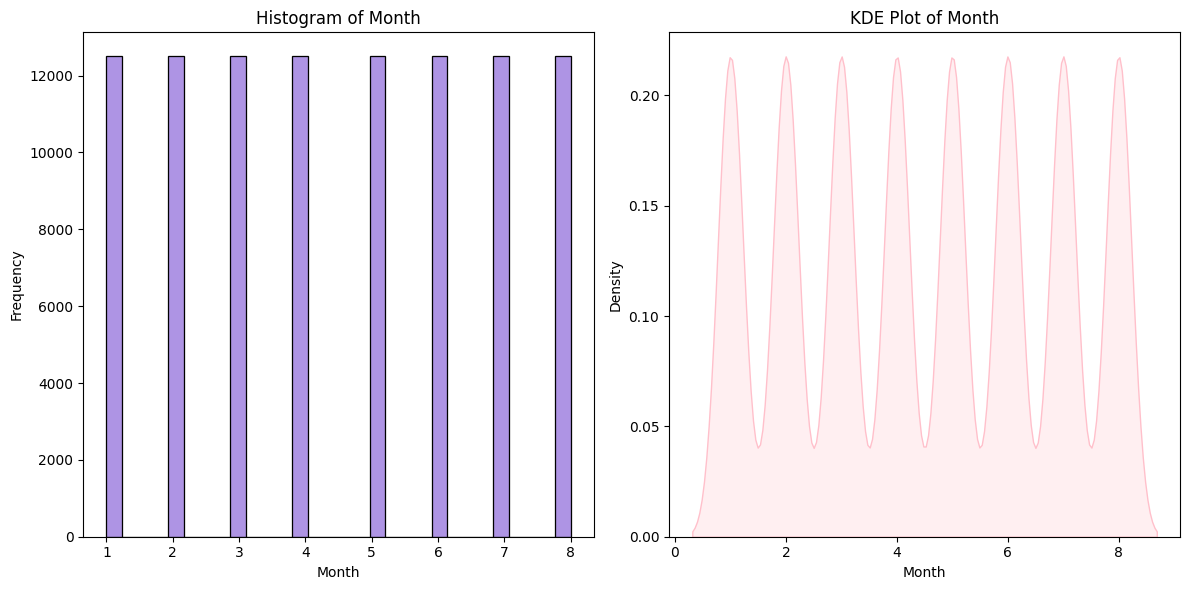

Skewness of Age: 0.16


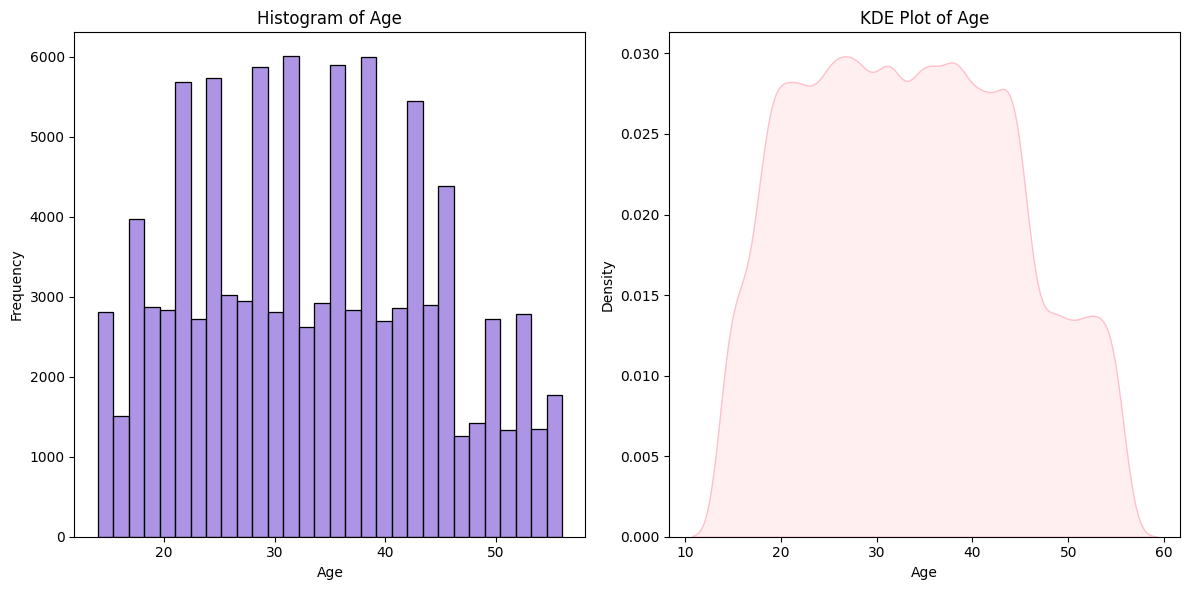

Skewness of Num_Bank_Accounts: -0.19


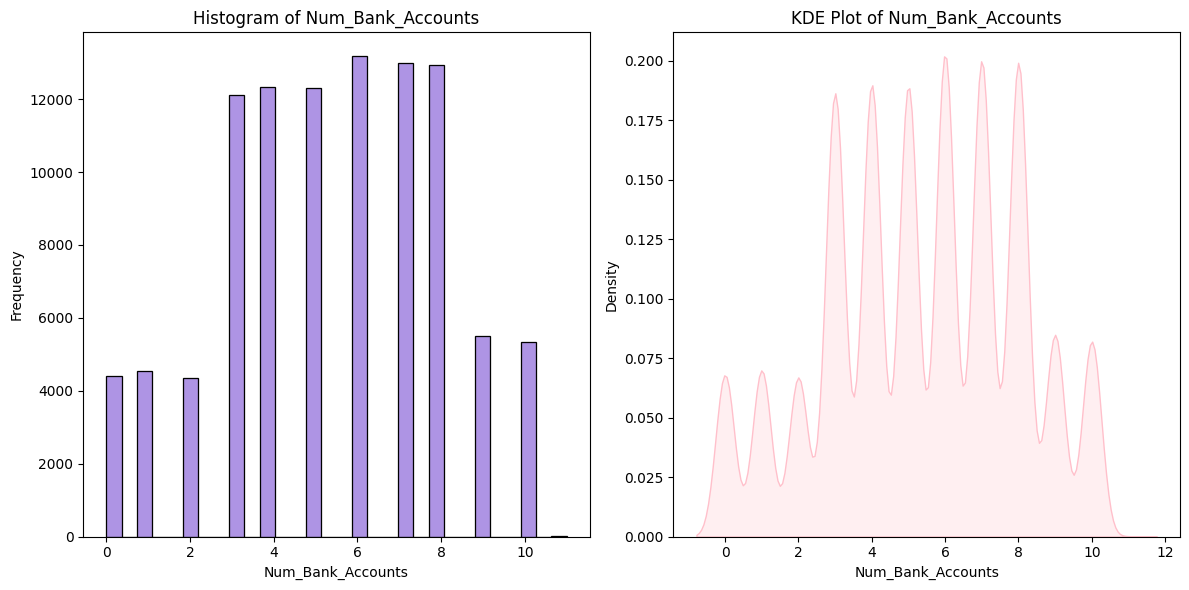

Skewness of Num_Credit_Card: 0.23


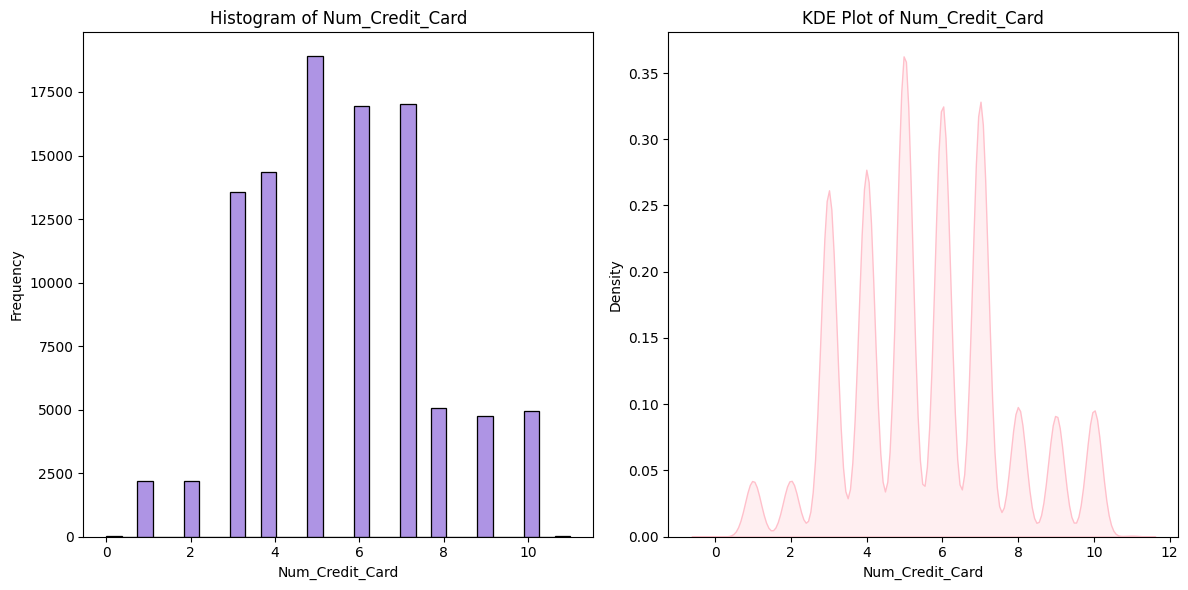

Skewness of Interest_Rate: 0.50


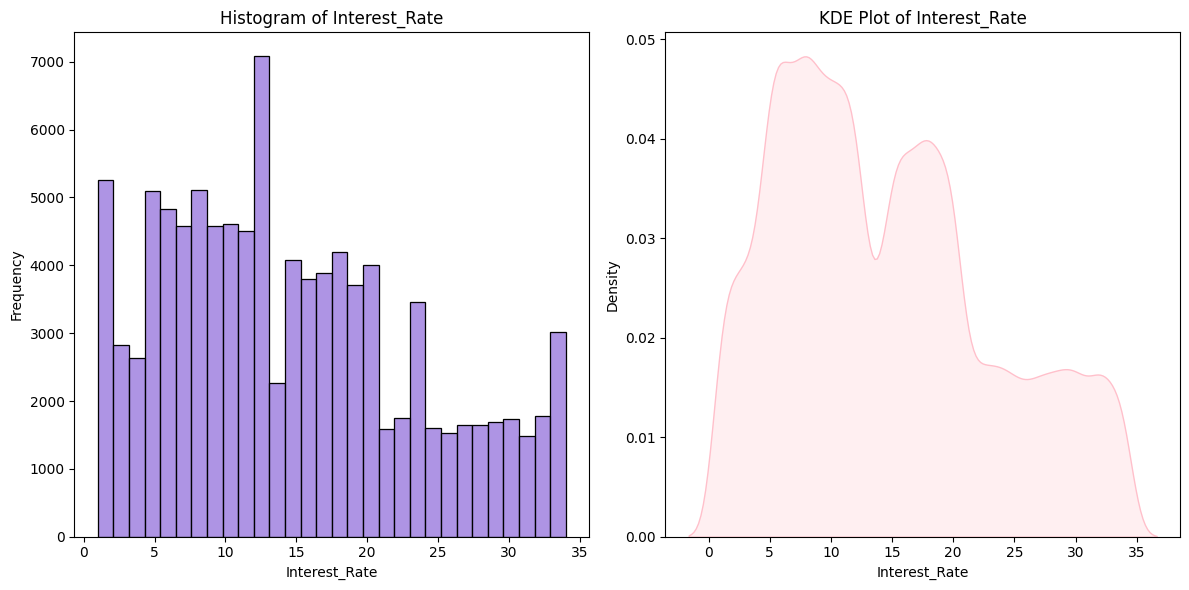

Skewness of Num_of_Loan: 0.45


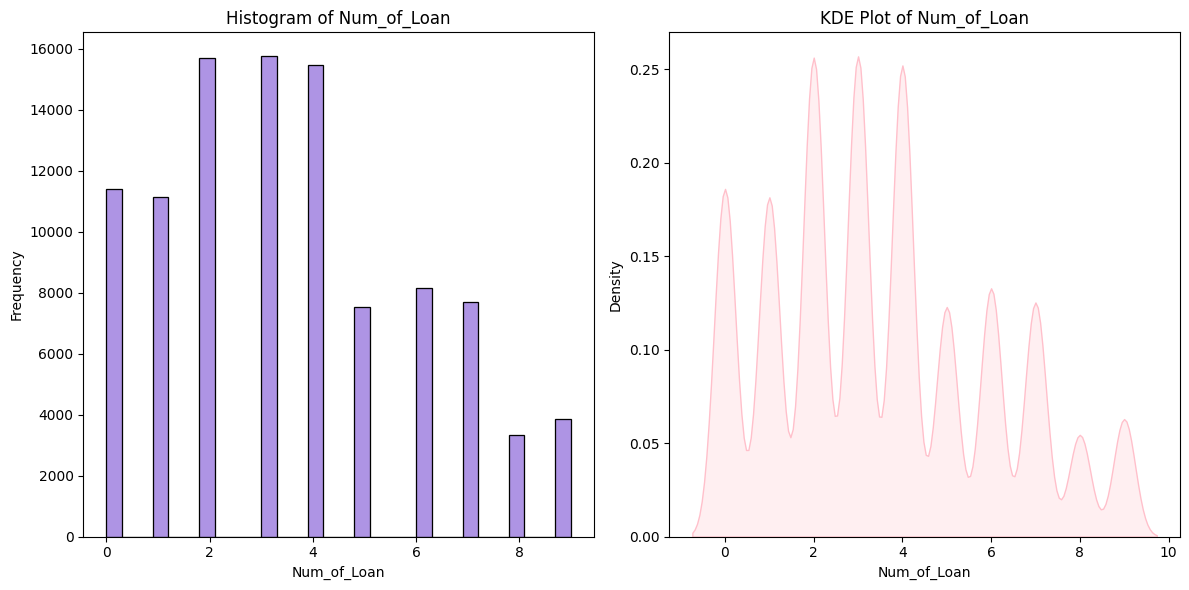

Skewness of Delay_from_due_date: 0.97


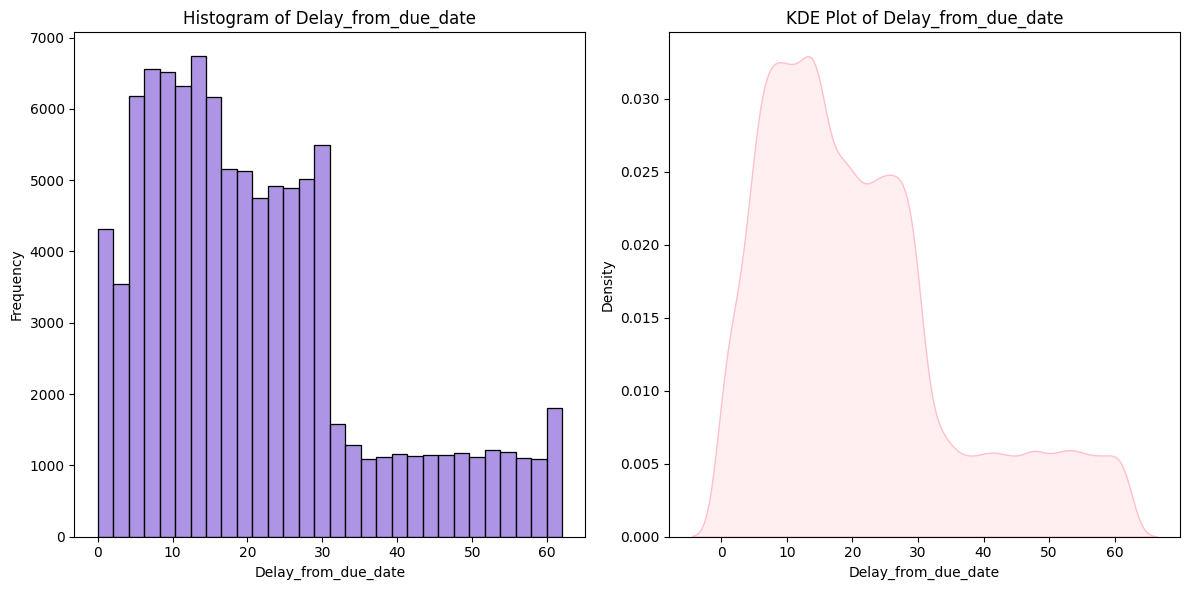

Skewness of Num_of_Delayed_Payment: -0.21


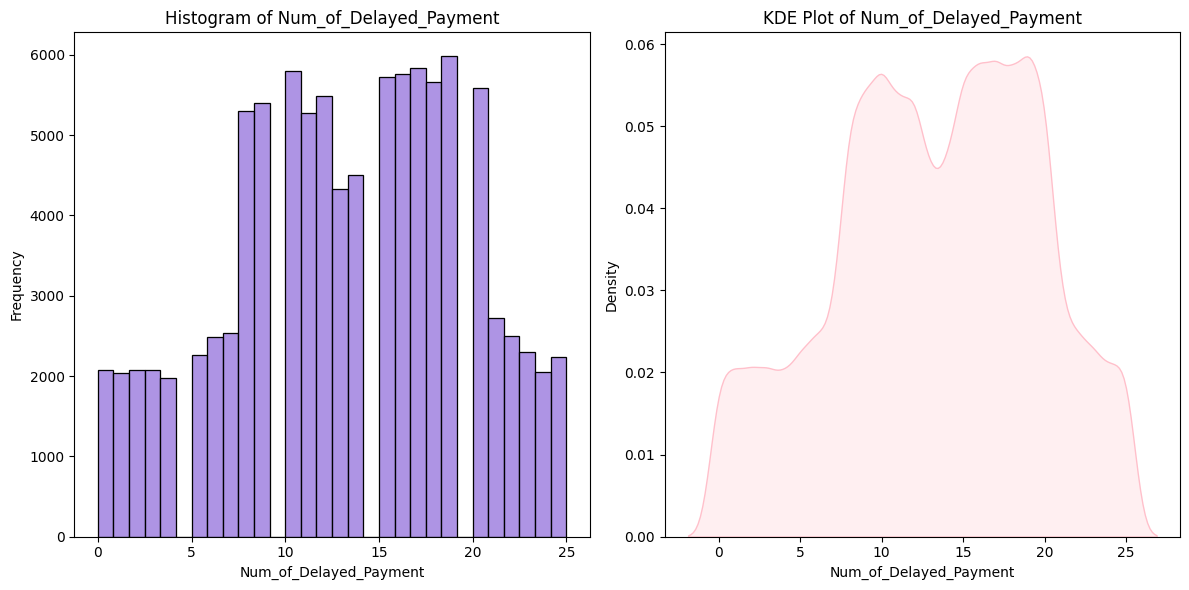

Skewness of Changed_Credit_Limit: 0.71


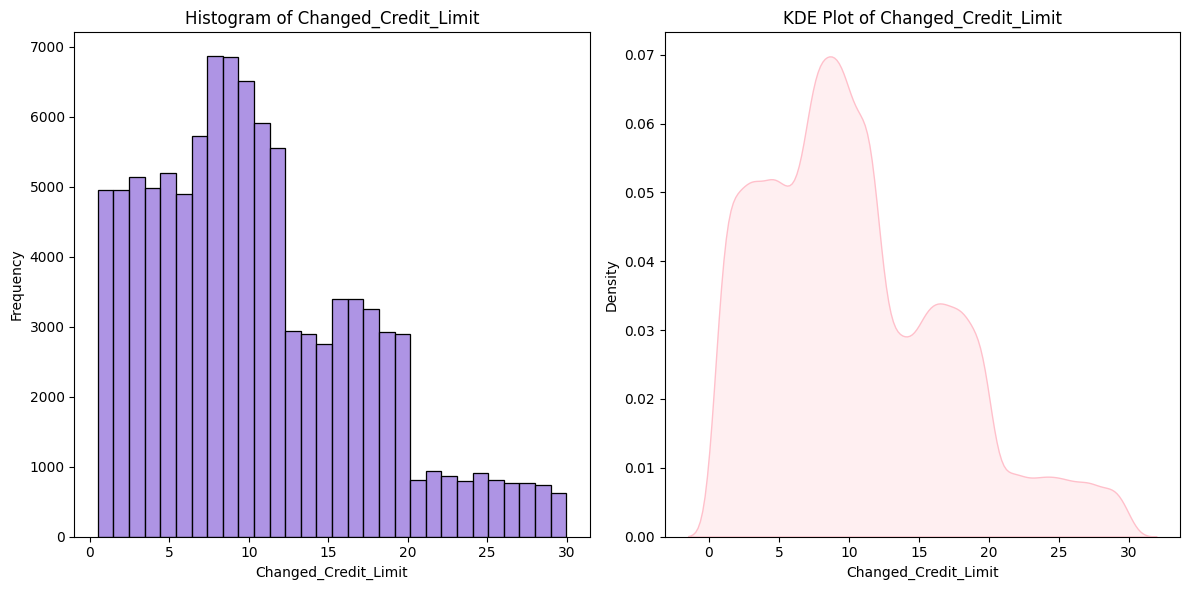

Skewness of Num_Credit_Inquiries: 0.41


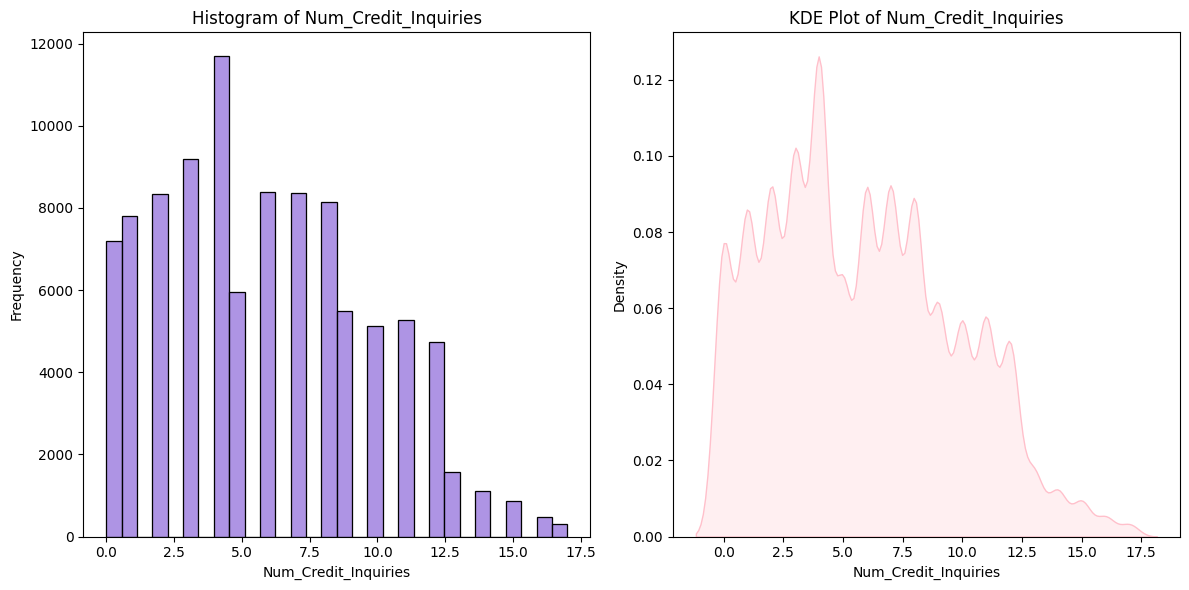

Skewness of Credit_History_Age: -0.05


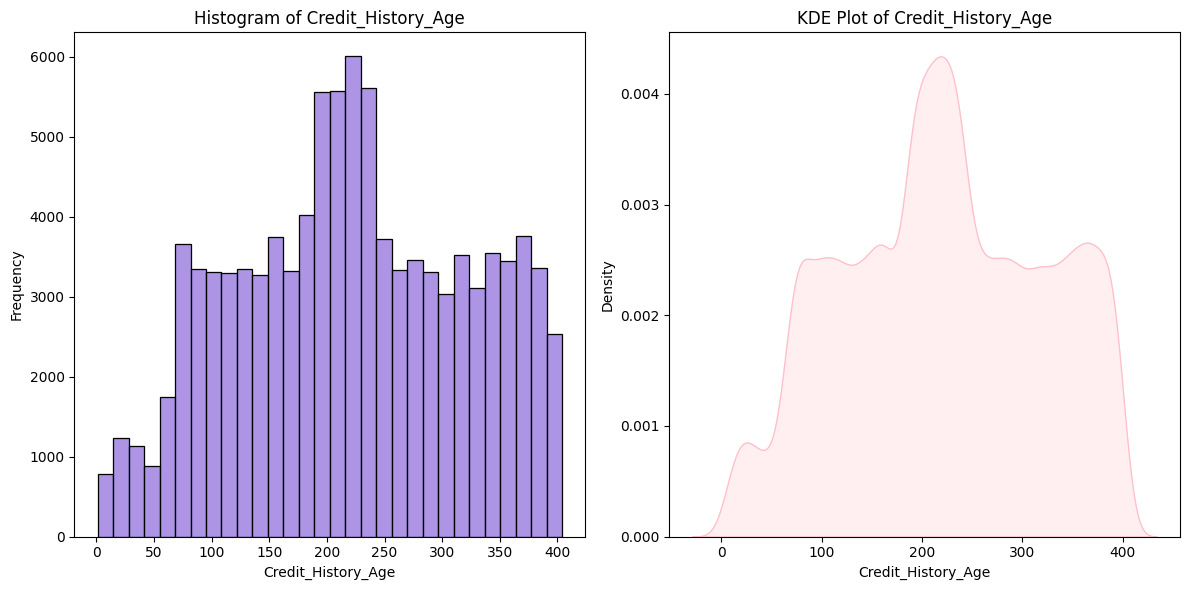

Skewness of Annual_Income: 1.13


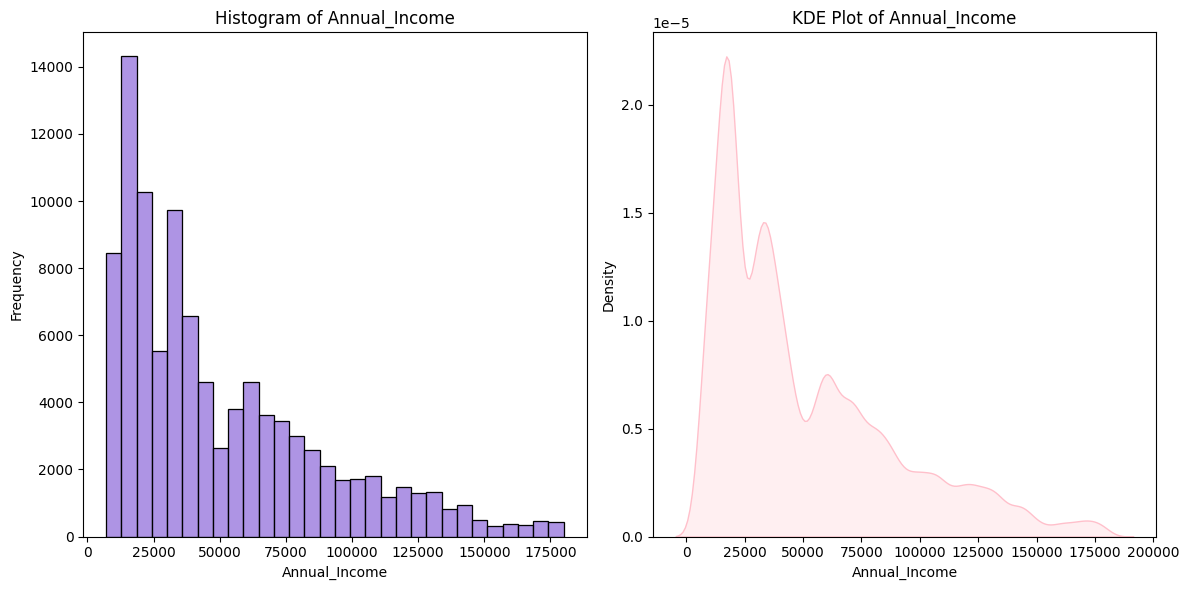

Skewness of Monthly_Inhand_Salary: 1.13


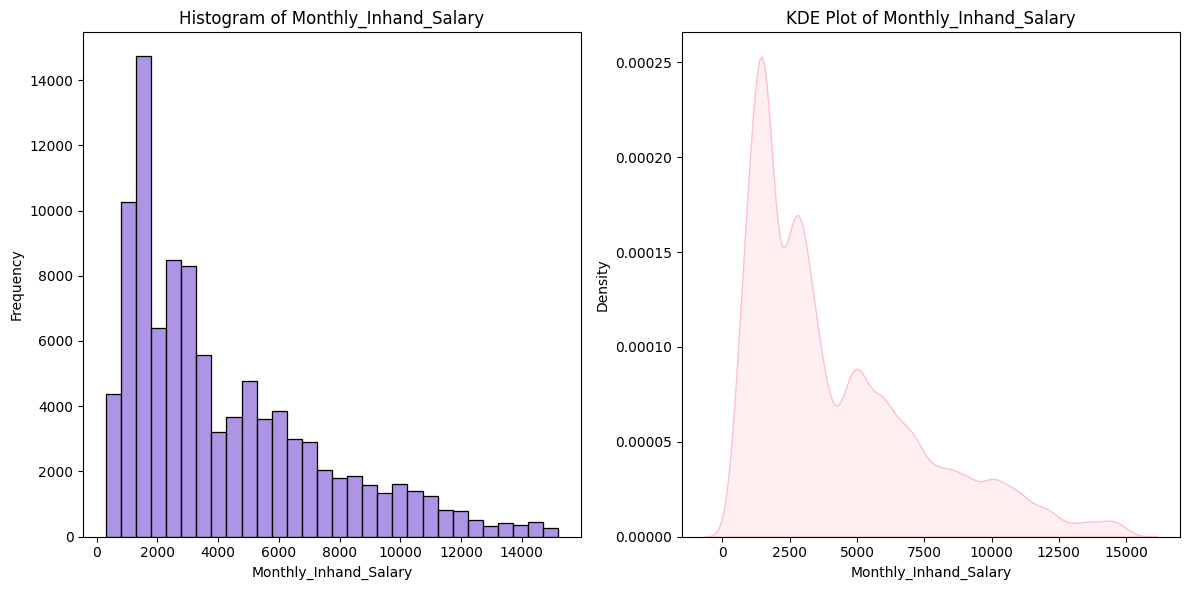

Skewness of Outstanding_Debt: 1.21


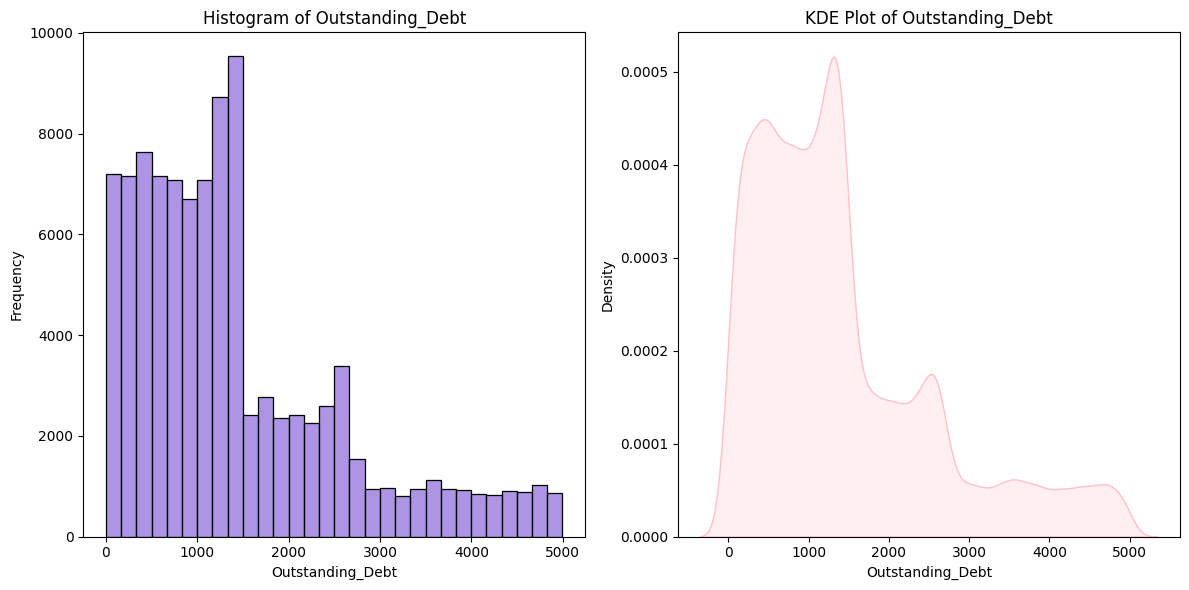

Skewness of Credit_Utilization_Ratio: 0.03


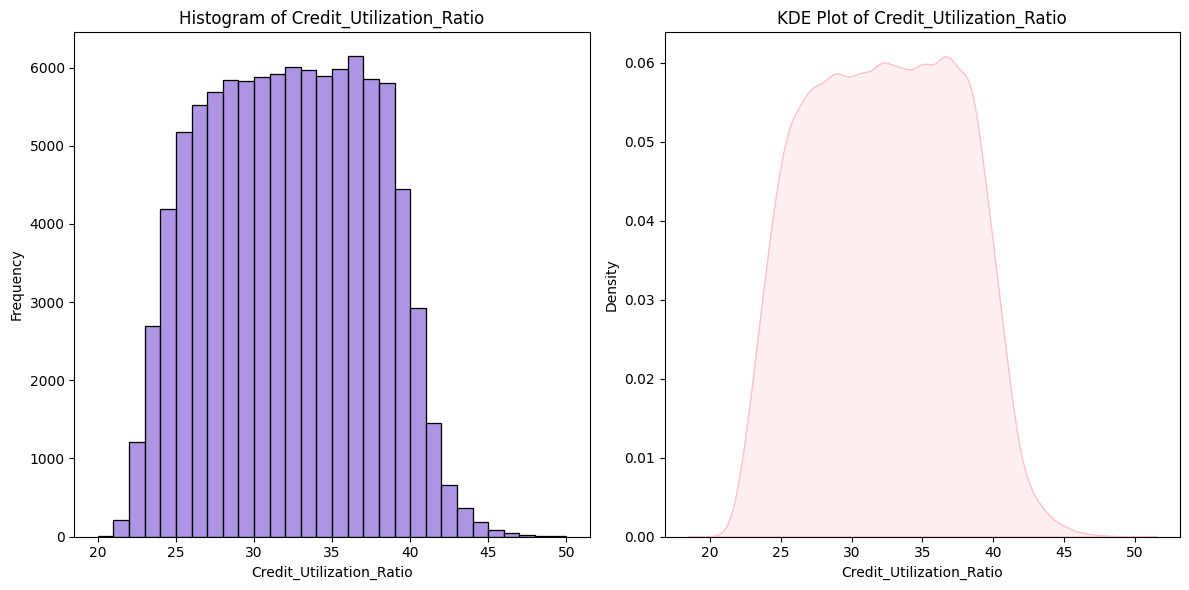

Skewness of Total_EMI_per_month: 4.04


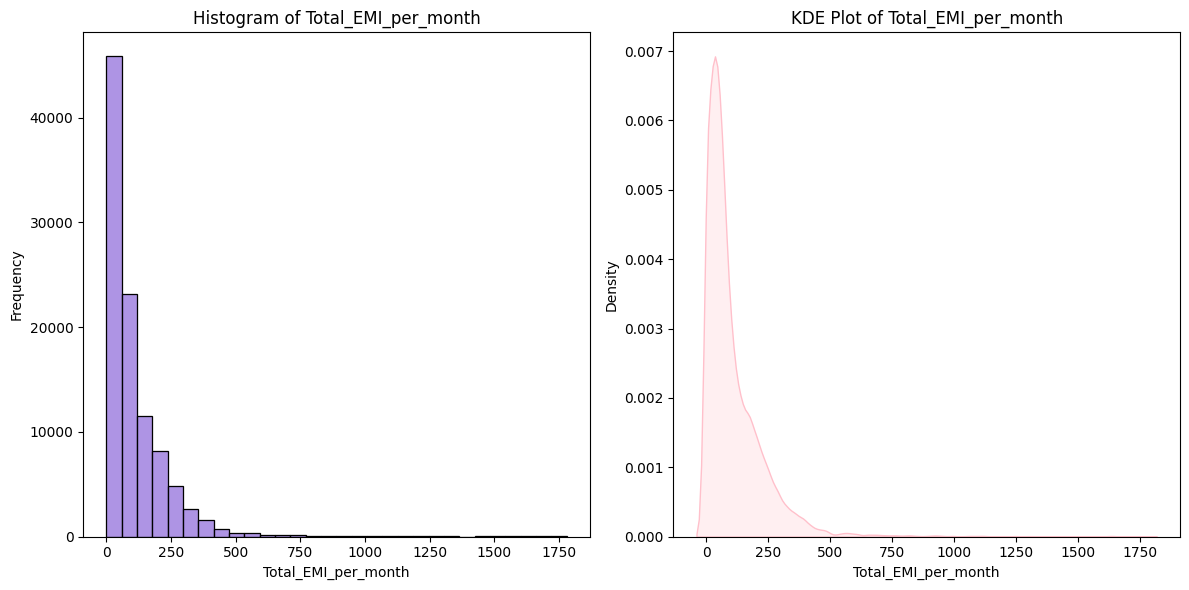

Skewness of Amount_invested_monthly: 1.76


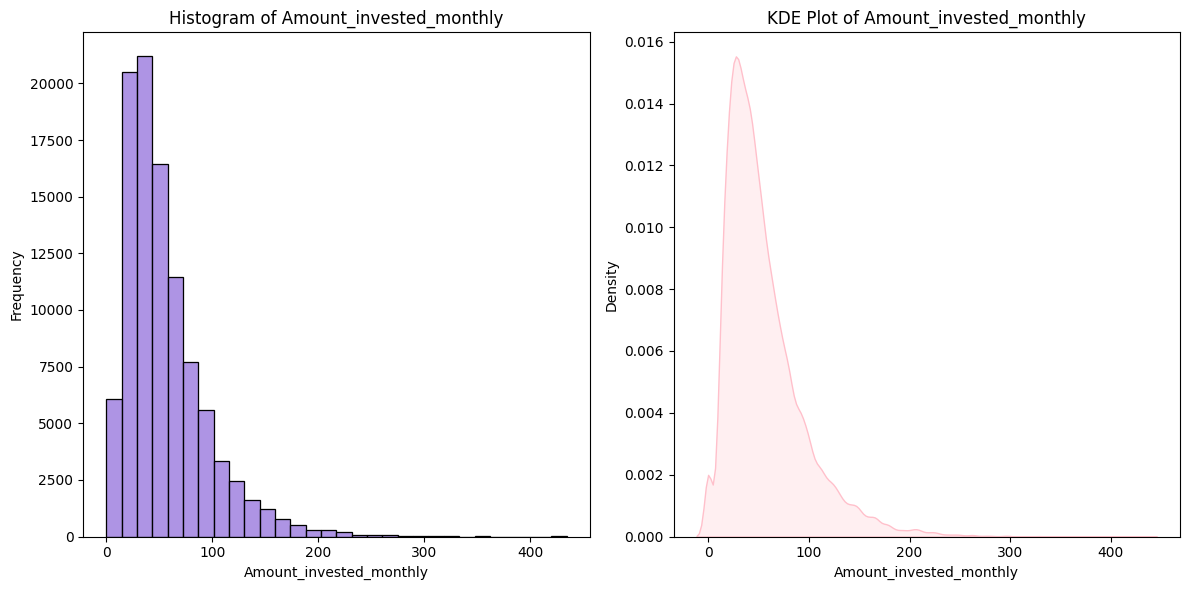

Skewness of Monthly_Balance: 1.36


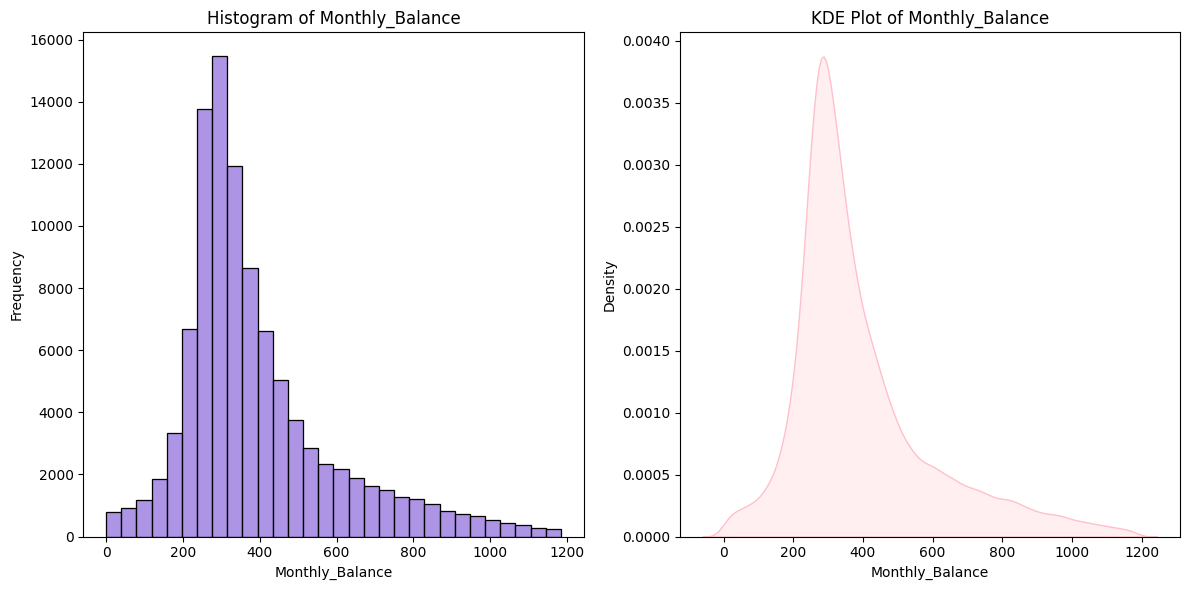

In [14]:
# List of numerical columns
numerical_columns = [
    'Month', 'Age', 'Num_Bank_Accounts', 'Num_Credit_Card',
    'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
    'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
    'Num_Credit_Inquiries', 'Credit_History_Age',
    'Annual_Income', 'Monthly_Inhand_Salary',
    'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
    'Amount_invested_monthly', 'Monthly_Balance'
]

# Plot histograms, KDE plots, and display skewness
for col in numerical_columns:
    plt.figure(figsize=(12, 6))

    # Calculate skewness
    col_skewness = skew(data[col].dropna())  # Drop NaNs for skewness calculation

    # Print skewness
    print(f'Skewness of {col}: {col_skewness:.2f}')

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=False, bins=30, color='mediumpurple')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # KDE Plot
    plt.subplot(1, 2, 2)
    sns.kdeplot(data[col], fill=True, color='pink')
    plt.title(f'KDE Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()


*   Month and Age: Approximately symmetric distributions
*   Interest_Rate, Num_of_Loan, Delay_from_due_date, Changed_Credit_Limit, Num_Credit_Inquiries, Annual_Income, Monthly_Inhand_Salary, Credit_Utilization_Ratio: These indicate some right tail (Moderate positive skew).
*  Outstanding_Debt (1.25), Total_EMI_per_month (4.04), Amount_invested_monthly (1.75), Monthly_Balance (1.33): Suggests significant right skew.
*   Num_Bank_Accounts and Num_of_Delayed_Payment: These indicate a left tail(negative skewness)






**3.2 Bivariate Analysis**

**Basic Information vs Credit score**

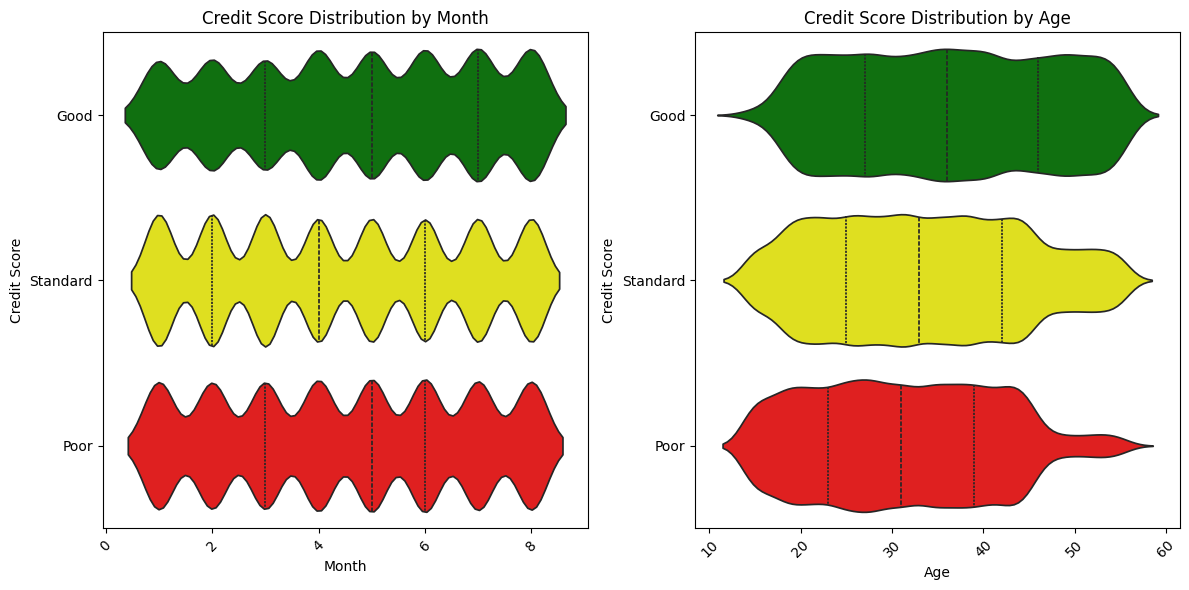

In [15]:
# Define color mapping for Credit Score categories
palette= {'Poor': 'red', 'Standard': 'yellow', 'Good': 'green'}
# List of plots to create
plot_info = [
    ('Month', 'Credit Score Distribution by Month'),
    ('Age', 'Credit Score Distribution by Age')
]

# Create a combined figure with side-by-side subplots
plt.figure(figsize=(12, 6))

# Loop through the plot information using enumerate
for idx, (x_var, title) in enumerate(plot_info):
    plt.subplot(1, 2, idx + 1)  # 1 row, 2 columns, idx+1 subplot
    sns.violinplot(x=x_var, y='Credit_Score', data=data, inner='quartile', palette=palette)
    plt.title(title)
    plt.xlabel(x_var)
    plt.ylabel('Credit Score')
    plt.xticks(rotation=45)

# Adjust layout and display
plt.tight_layout()
plt.show()

* The distribution of good credit scores is relatively consistent across the months. There are slight variations, but no significant peaks or troughs indicating strong seasonality.
* "Good" credit score are spread across different ages, with a noticeable concentration around the 30-40 age range."Poor" credit score are also distributed across different ages but with a slight concentration around the 20-30 age range."Standard" credit score are mostly found in the age range of around 30-40.

**Income and Salary vs credit score**

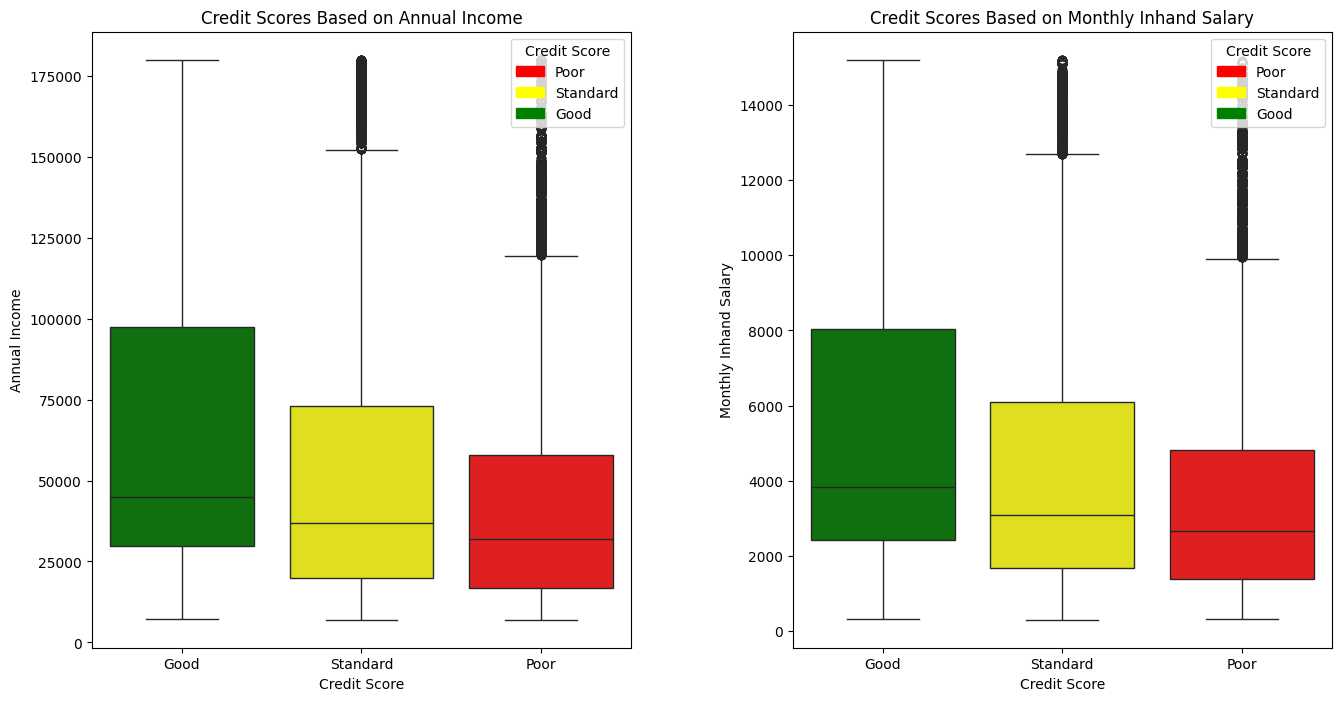

In [16]:
# Create a figure with a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))  # 1 row, 2 columns
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust space between plots

# Plot 1: Annual Income
sns.boxplot(ax=axes[0], x='Credit_Score', y='Annual_Income', data=data, hue='Credit_Score', dodge=False, palette=palette)
axes[0].set_title('Credit Scores Based on Annual Income')
axes[0].set_xlabel('Credit Score')
axes[0].set_ylabel('Annual Income')

# Create legend labels for Annual Income
legend_labels = [mpatches.Patch(color=color, label=score) for score, color in palette.items()]
axes[0].legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Plot 2: Monthly Inhand Salary
sns.boxplot(ax=axes[1], x='Credit_Score', y='Monthly_Inhand_Salary', data=data, hue='Credit_Score', dodge=False, palette=palette)
axes[1].set_title('Credit Scores Based on Monthly Inhand Salary')
axes[1].set_xlabel('Credit Score')
axes[1].set_ylabel('Monthly Inhand Salary')

# Create legend labels for Monthly Inhand Salary
axes[1].legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Show the plot
plt.show()

* Annual income and credit scores are directly propotional ,more you earn better the scores.
* Monthly inhand and credit scores are directly propotional ,more you earn better the scores.

**Banking and Accounts vs Credit score**

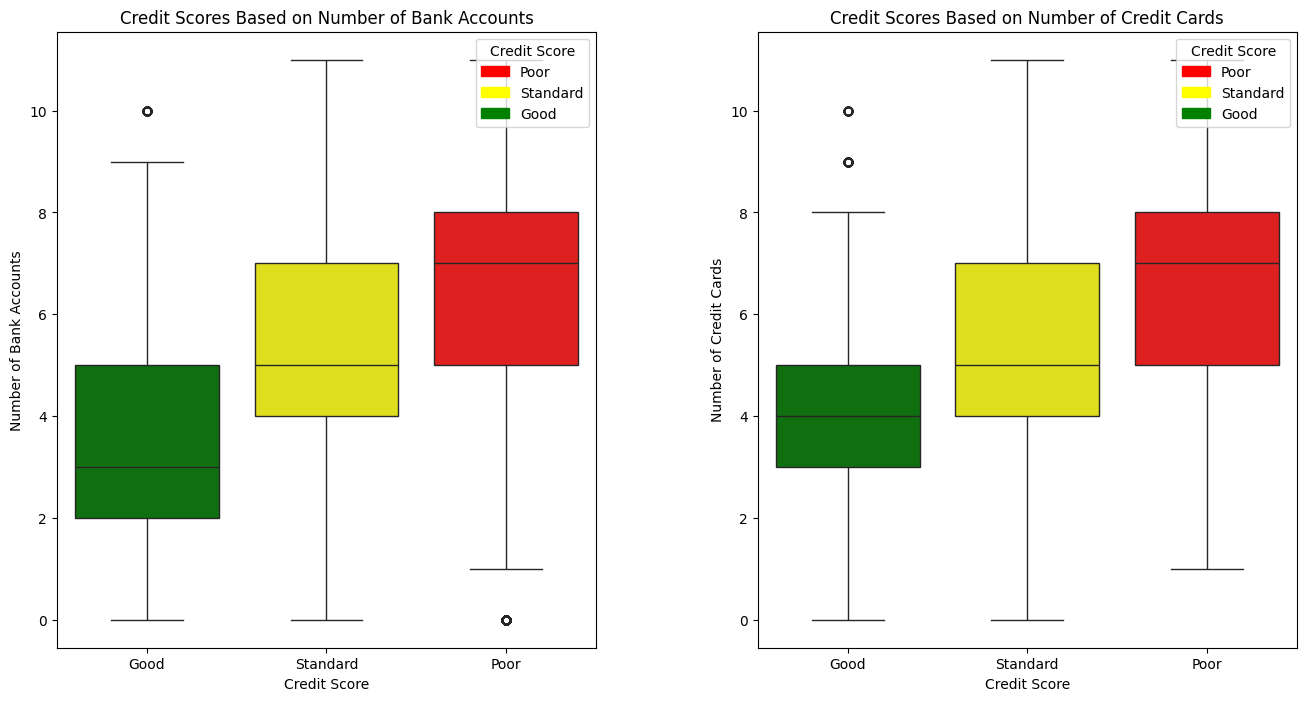

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))  # 1 row, 2 columns
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust space between plots

# Plot 1: Number of Bank Accounts
sns.boxplot(ax=axes[0], x='Credit_Score', y='Num_Bank_Accounts', data=data, hue='Credit_Score', dodge=False, palette=palette)
axes[0].set_title('Credit Scores Based on Number of Bank Accounts')
axes[0].set_xlabel('Credit Score')
axes[0].set_ylabel('Number of Bank Accounts')

# Create legend labels for Number of Bank Accounts
legend_labels = [mpatches.Patch(color=color, label=score) for score, color in palette.items()]
axes[0].legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Plot 2: Number of Credit Cards
sns.boxplot(ax=axes[1], x='Credit_Score', y='Num_Credit_Card', data=data, hue='Credit_Score', dodge=False, palette=palette)
axes[1].set_title('Credit Scores Based on Number of Credit Cards')
axes[1].set_xlabel('Credit Score')
axes[1].set_ylabel('Number of Credit Cards')

# Create legend labels for Number of Credit Cards
axes[1].legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Show the plot
plt.show()

* Having 2-4 accounts is good enough, but having 5 or more adversly effect credit score.Similar to the number of bank accounts, having more credit cards will not positively impact your credit scores. Having 3 – 5 credit cards is good for your credit score.

**Loans and Payments vs Credit Score**

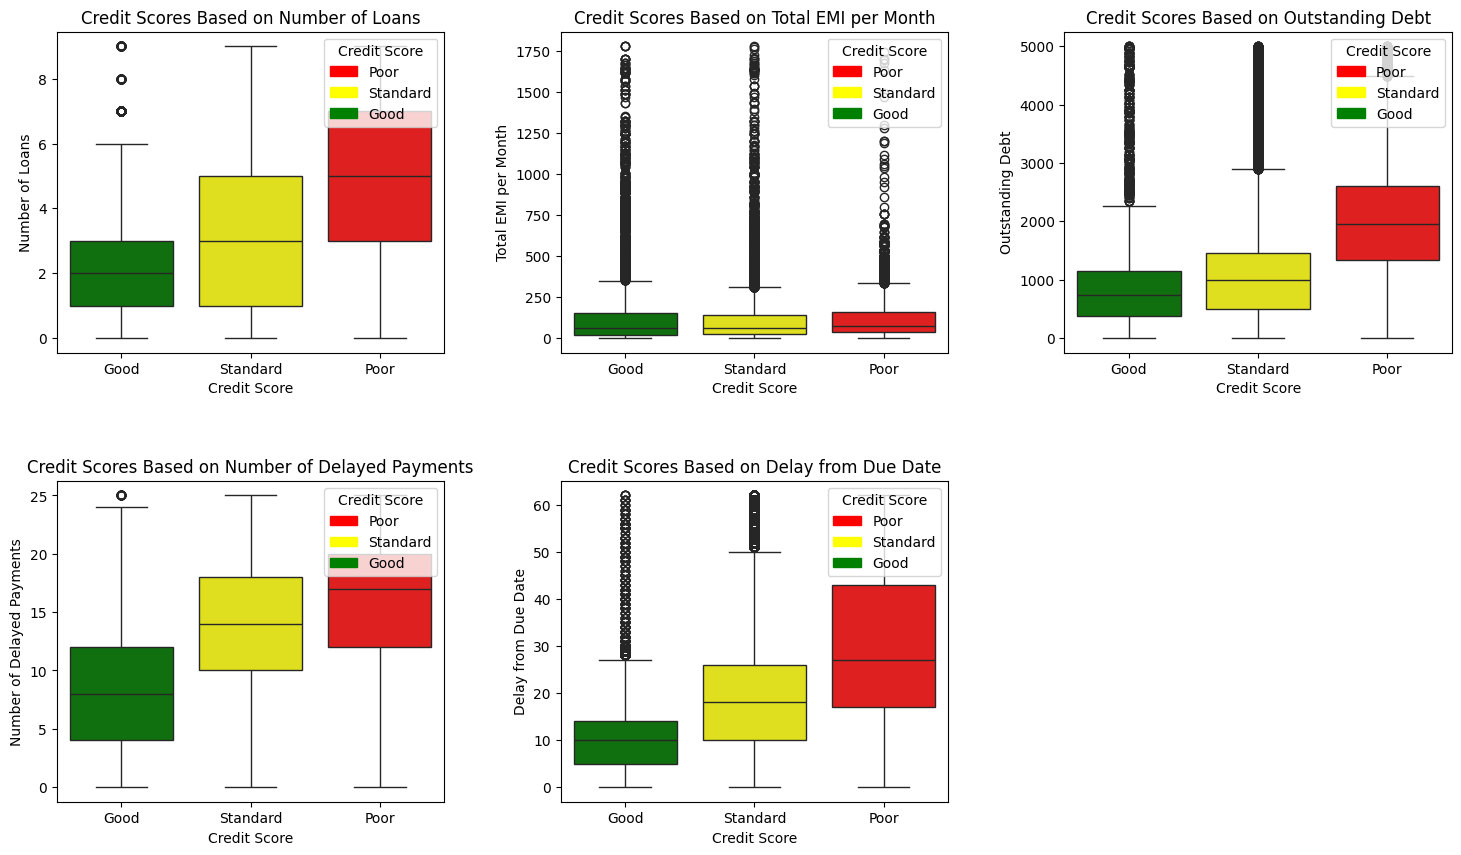

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # 2 rows, 3 columns
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust space between plots

# Plot 1: Number of Loans
sns.boxplot(ax=axes[0, 0], x='Credit_Score', y='Num_of_Loan', data=data, hue='Credit_Score', dodge=False, palette=palette)
axes[0, 0].set_title('Credit Scores Based on Number of Loans')
axes[0, 0].set_xlabel('Credit Score')
axes[0, 0].set_ylabel('Number of Loans')

# Create legend labels for Number of Loans
legend_labels = [mpatches.Patch(color=color, label=score) for score, color in palette.items()]
axes[0, 0].legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Plot 2: Total EMI per Month
sns.boxplot(ax=axes[0, 1], x='Credit_Score', y='Total_EMI_per_month', data=data, hue='Credit_Score', dodge=False, palette=palette)
axes[0, 1].set_title('Credit Scores Based on Total EMI per Month')
axes[0, 1].set_xlabel('Credit Score')
axes[0, 1].set_ylabel('Total EMI per Month')

# Create legend labels for Total EMI per Month
axes[0, 1].legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Plot 3: Outstanding Debt
sns.boxplot(ax=axes[0, 2], x='Credit_Score', y='Outstanding_Debt', data=data, hue='Credit_Score', dodge=False, palette=palette)
axes[0, 2].set_title('Credit Scores Based on Outstanding Debt')
axes[0, 2].set_xlabel('Credit Score')
axes[0, 2].set_ylabel('Outstanding Debt')

# Create legend labels for Outstanding Debt
axes[0, 2].legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Plot 4: Number of Delayed Payments
sns.boxplot(ax=axes[1, 0], x='Credit_Score', y='Num_of_Delayed_Payment', data=data, hue='Credit_Score', dodge=False, palette=palette)
axes[1, 0].set_title('Credit Scores Based on Number of Delayed Payments')
axes[1, 0].set_xlabel('Credit Score')
axes[1, 0].set_ylabel('Number of Delayed Payments')

# Create legend labels for Number of Delayed Payments
axes[1, 0].legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Plot 5: Delay from Due Date
sns.boxplot(ax=axes[1, 1], x='Credit_Score', y='Delay_from_due_date', data=data, hue='Credit_Score', dodge=False, palette=palette)
axes[1, 1].set_title('Credit Scores Based on Delay from Due Date')
axes[1, 1].set_xlabel('Credit Score')
axes[1, 1].set_ylabel('Delay from Due Date')

# Create legend labels for Delay from Due Date
axes[1, 1].legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Hide the last subplot (1, 2) since we have only five plots
axes[1, 2].axis('off')

# Show the plot
plt.show()

* To have a good credit score, you should not take more than 1 – 3 loans at a time. Having more than three loans at a time will negatively impact your credit scores.

* Delaying 4 – 12 payments from the due date will not affect your credit scores. But delaying more than 12 payments from the due date will affect your credit scores negatively.

* So you can delay your credit card payment 5 – 14 days from the due date. Delaying your payments for more than 17 days from the due date will impact your credit scores negatively.

* An outstanding debt of $300  to   $1200 will not affect your credit scores. But always having a debt of more than $1400 will affect your credit scores negatively.

* It is visually difficult to get inference on Total EMI per month.So resorted to further techniques.

ANOVA F-statistic: 176.70325485323735
ANOVA p-value: 2.4776569266915847e-77
The differences between groups are statistically significant.


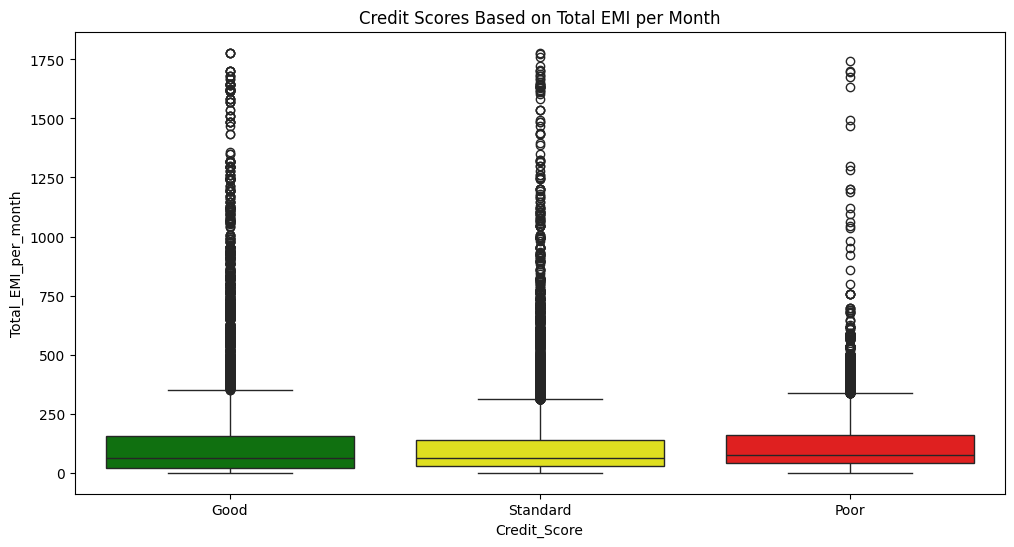

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1  group2  meandiff p-adj  lower    upper  reject
------------------------------------------------------
  Good     Poor -10.4927   0.0 -13.4378 -7.5475   True
  Good Standard -20.5912   0.0 -23.2693 -17.913   True
  Poor Standard -10.0985   0.0 -12.3575 -7.8394   True
------------------------------------------------------


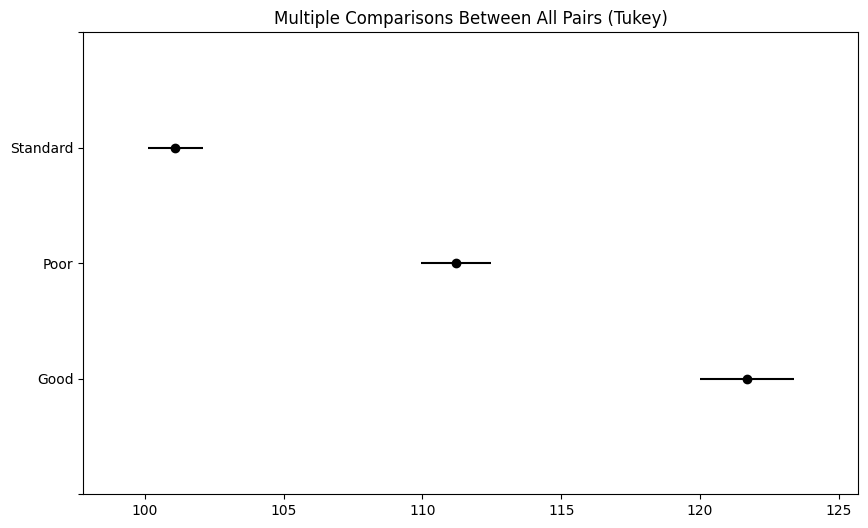

In [31]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
# Define color mapping
palette = {'Poor': 'red', 'Standard': 'yellow', 'Good': 'green'}

# Separate Total EMI per Month by Credit Score categories
good_emi = data[data['Credit_Score'] == 'Good']['Total_EMI_per_month']
standard_emi = data[data['Credit_Score'] == 'Standard']['Total_EMI_per_month']
poor_emi = data[data['Credit_Score'] == 'Poor']['Total_EMI_per_month']

# Perform ANOVA
f_stat, p_value = f_oneway(good_emi, standard_emi, poor_emi)
print(f"ANOVA F-statistic: {f_stat}")
print(f"ANOVA p-value: {p_value}")

if p_value < 0.05:
    print("The differences between groups are statistically significant.")
else:
    print("The differences between groups are not statistically significant.")

# Plotting the box plot for visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x='Credit_Score', y='Total_EMI_per_month', data=data, palette=palette)
plt.title('Credit Scores Based on Total EMI per Month')
plt.show()

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=data['Total_EMI_per_month'], groups=data['Credit_Score'], alpha=0.05)

# Print the summary of the test
print(tukey.summary())

# Visualize the test results
fig, ax = plt.subplots(figsize=(10, 6))
tukey.plot_simultaneous(ax=ax)
plt.show()

Individuals with Poor credit scores tend to have the highest EMI payments, followed by those with Standard credit scores, and then those with Good credit scores

**Credit Management vs Credit score**

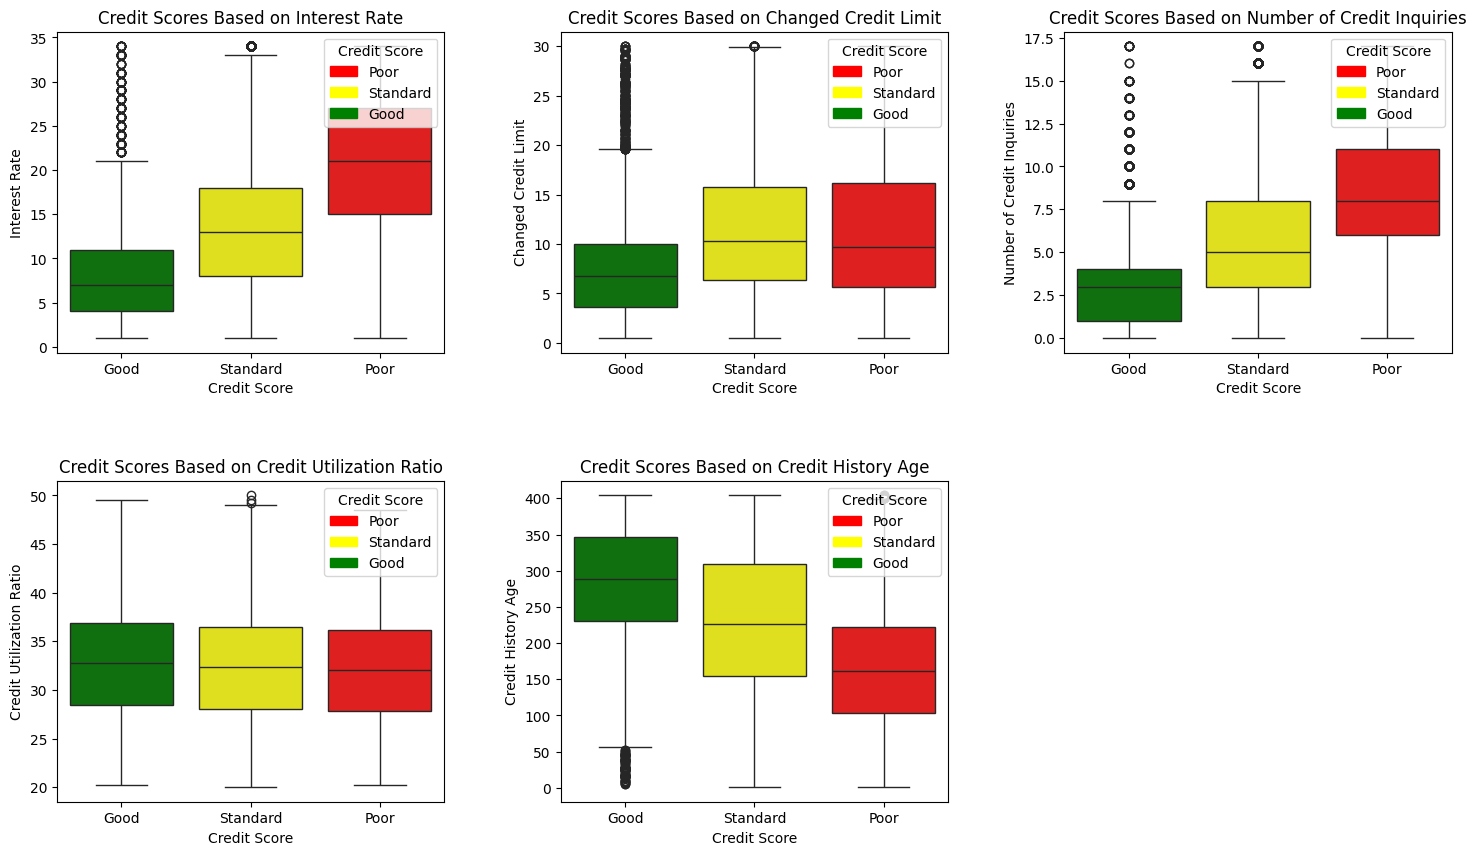

In [32]:

# Assuming 'data' is your DataFrame and 'palette' is defined
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # 2 rows, 3 columns
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust space between plots

# Plot 1: Interest Rate
sns.boxplot(ax=axes[0, 0], x='Credit_Score', y='Interest_Rate', data=data, hue='Credit_Score', dodge=False, palette=palette)
axes[0, 0].set_title('Credit Scores Based on Interest Rate')
axes[0, 0].set_xlabel('Credit Score')
axes[0, 0].set_ylabel('Interest Rate')

# Create legend labels for Interest Rate
legend_labels = [mpatches.Patch(color=color, label=score) for score, color in palette.items()]
axes[0, 0].legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Plot 2: Changed Credit Limit
sns.boxplot(ax=axes[0, 1], x='Credit_Score', y='Changed_Credit_Limit', data=data, hue='Credit_Score', dodge=False, palette=palette)
axes[0, 1].set_title('Credit Scores Based on Changed Credit Limit')
axes[0, 1].set_xlabel('Credit Score')
axes[0, 1].set_ylabel('Changed Credit Limit')

# Create legend labels for Changed Credit Limit
axes[0, 1].legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Plot 3: Number of Credit Inquiries
sns.boxplot(ax=axes[0, 2], x='Credit_Score', y='Num_Credit_Inquiries', data=data, hue='Credit_Score', dodge=False, palette=palette)
axes[0, 2].set_title('Credit Scores Based on Number of Credit Inquiries')
axes[0, 2].set_xlabel('Credit Score')
axes[0, 2].set_ylabel('Number of Credit Inquiries')

# Create legend labels for Number of Credit Inquiries
axes[0, 2].legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Plot 4: Credit Utilization Ratio
sns.boxplot(ax=axes[1, 0], x='Credit_Score', y='Credit_Utilization_Ratio', data=data, hue='Credit_Score', dodge=False, palette=palette)
axes[1, 0].set_title('Credit Scores Based on Credit Utilization Ratio')
axes[1, 0].set_xlabel('Credit Score')
axes[1, 0].set_ylabel('Credit Utilization Ratio')

# Create legend labels for Credit Utilization Ratio
axes[1, 0].legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Plot 5: Credit History Age
sns.boxplot(ax=axes[1, 1], x='Credit_Score', y='Credit_History_Age', data=data, hue='Credit_Score', dodge=False, palette=palette)
axes[1, 1].set_title('Credit Scores Based on Credit History Age')
axes[1, 1].set_xlabel('Credit Score')
axes[1, 1].set_ylabel('Credit History Age')

# Create legend labels for Credit History Age
axes[1, 1].legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Hide the last subplot (1, 2) since we have only five plots
axes[1, 2].axis('off')

# Show the plot
plt.show()

In [34]:
import scipy.stats as stats
# Perform ANOVA
anova_result = stats.f_oneway(
    data[data['Credit_Score'] == 'Good']['Credit_Utilization_Ratio'],
    data[data['Credit_Score'] == 'Standard']['Credit_Utilization_Ratio'],
    data[data['Credit_Score'] == 'Poor']['Credit_Utilization_Ratio']
)

print("ANOVA Test Result")
print("=================")
print(f"F-statistic: {anova_result.statistic}")
print(f"p-value: {anova_result.pvalue}")

ANOVA Test Result
F-statistic: 105.29672169033603
p-value: 2.0811372175521815e-46


* If the average interest rate is 4 – 11%, the credit score is good. Having an average interest rate of more than 15% is bad for your credit scores.
* Good Credit Scores are associated with smaller changes in credit limits and fewer credit inquiries.
Poor Credit Scores are linked to larger changes in credit limits and more credit inquiries
* Credit utilization ratio means your total debt divided by your total available credit.
A higher credit utilization ratio can negatively impact a credit score because it suggests that a borrower might be over-relying on credit and could be at a higher risk of default. Conversely, a lower credit utilization ratio is generally favorable for credit scores as it indicates better credit management and lower risk.
* So, having a long credit history results in better credit scores

**Investments and Savings vs credit Score**

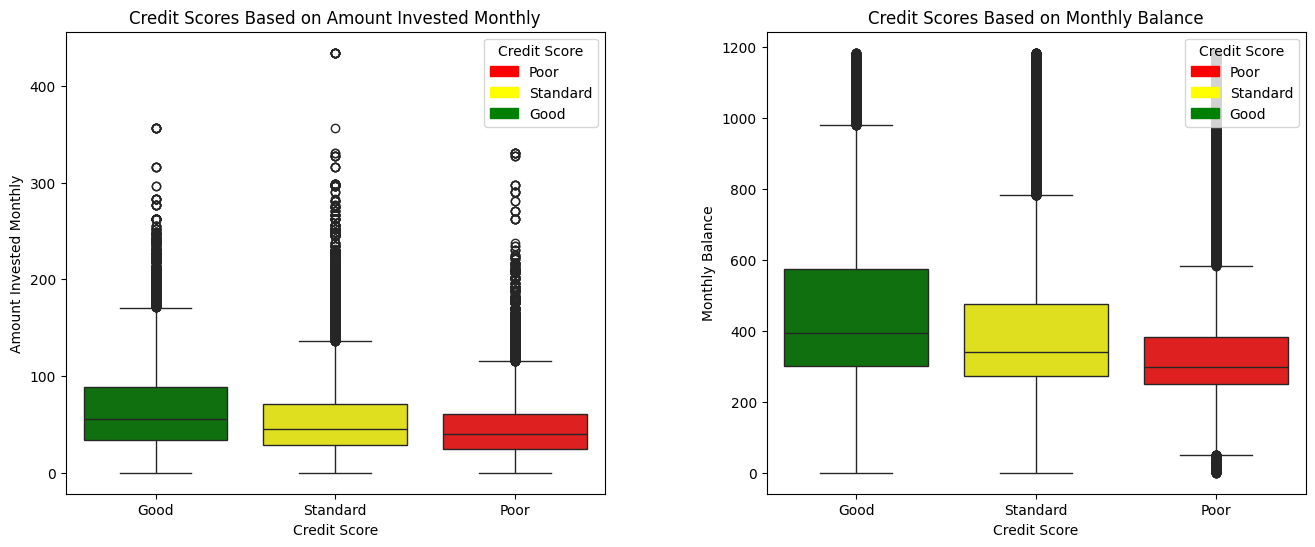

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))  # 1 row, 2 columns
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust space between plots

# Plot 1: Amount Invested Monthly
sns.boxplot(ax=axes[0], x='Credit_Score', y='Amount_invested_monthly', data=data, hue='Credit_Score', dodge=False, palette=palette)
axes[0].set_title('Credit Scores Based on Amount Invested Monthly')
axes[0].set_xlabel('Credit Score')
axes[0].set_ylabel('Amount Invested Monthly')

# Create legend labels for Amount Invested Monthly
legend_labels = [mpatches.Patch(color=color, label=score) for score, color in palette.items()]
axes[0].legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Plot 2: Monthly Balance
sns.boxplot(ax=axes[1], x='Credit_Score', y='Monthly_Balance', data=data, hue='Credit_Score', dodge=False, palette=palette)
axes[1].set_title('Credit Scores Based on Monthly Balance')
axes[1].set_xlabel('Credit Score')
axes[1].set_ylabel('Monthly Balance')

# Create legend labels for Monthly Balance
axes[1].legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Show the plot
plt.show()

* The amount of money you invest monthly doesn’t affect  your credit scores a lot.

* Monthly balances are similar across Good, Poor, and Standard credit scores, with similar medians around 400, interquartile ranges between approximately 200 and 600, but with more outliers above 1000 in the Good and Standard categories.So, having a high monthly balance in your account at the end of the month is good for your credit scores. A monthly balance of less than $250 is bad for credit scores.


**Categorical columns vs Credit score**

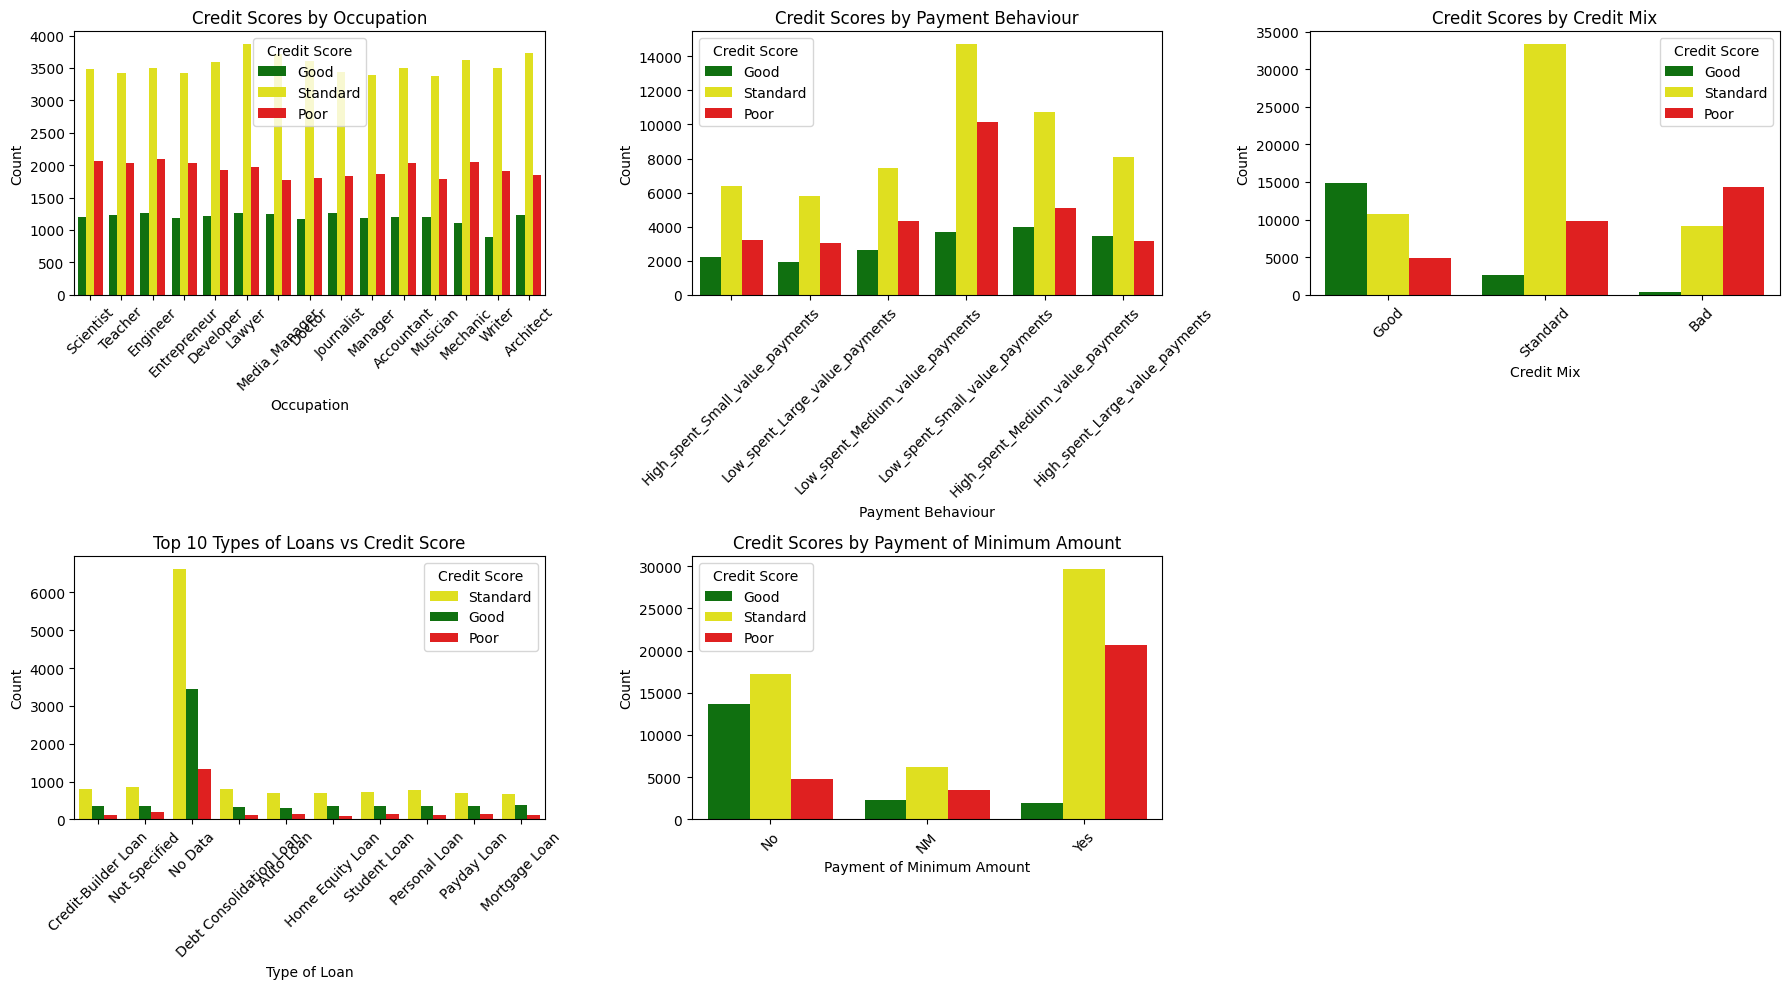

In [36]:
# Create a figure with a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # 2 rows, 3 columns
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust space between plots

# Plot 1: Occupation
sns.countplot(ax=axes[0, 0], x='Occupation', hue='Credit_Score', data=data, palette=palette)
axes[0, 0].set_title('Credit Scores by Occupation')
axes[0, 0].set_xlabel('Occupation')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend(title='Credit Score')
axes[0, 0].tick_params(axis='x', rotation=45)  # Rotate x-tick labels

# Plot 2: Payment Behaviour
sns.countplot(ax=axes[0, 1], x='Payment_Behaviour', hue='Credit_Score', data=data, palette=palette)
axes[0, 1].set_title('Credit Scores by Payment Behaviour')
axes[0, 1].set_xlabel('Payment Behaviour')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(title='Credit Score')
axes[0, 1].tick_params(axis='x', rotation=45)  # Rotate x-tick labels

# Plot 3: Credit Mix
sns.countplot(ax=axes[0, 2], x='Credit_Mix', hue='Credit_Score', data=data, palette=palette)
axes[0, 2].set_title('Credit Scores by Credit Mix')
axes[0, 2].set_xlabel('Credit Mix')
axes[0, 2].set_ylabel('Count')
axes[0, 2].legend(title='Credit Score')
axes[0, 2].tick_params(axis='x', rotation=45)  # Rotate x-tick labels

# Get top 10 types of loans
top_loan_types = data['Type_of_Loan'].value_counts().nlargest(10).index
filtered_data = data[data['Type_of_Loan'].isin(top_loan_types)]

# Plot 4: Top 10 Types of Loans vs Credit Score
sns.countplot(ax=axes[1, 0], x='Type_of_Loan', hue='Credit_Score', data=filtered_data, palette=palette)
axes[1, 0].set_title('Top 10 Types of Loans vs Credit Score')
axes[1, 0].set_xlabel('Type of Loan')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='Credit Score')
axes[1, 0].tick_params(axis='x', rotation=45)  # Rotate x-tick labels

# Plot 5: Payment of Minimum Amount
sns.countplot(ax=axes[1, 1], x='Payment_of_Min_Amount', hue='Credit_Score', data=data, palette=palette)
axes[1, 1].set_title('Credit Scores by Payment of Minimum Amount')
axes[1, 1].set_xlabel('Payment of Minimum Amount')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Credit Score')
axes[1, 1].tick_params(axis='x', rotation=45)  # Rotate x-tick labels

# Hide unused subplot (1, 2)
axes[1, 2].axis('off')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


* "Standard" credit scores are the most common across most occupations.
Occupation seems to have a similar distribution of credit scores, with no occupation standing out significantly.
* "Standard" scores are most common for "High_spent_Medium_value_payments".
Different payment behaviors have varied distributions of credit scores.
* "Standard" credit scores dominate in the "Standard" credit mix category.
* "No Data" category has a large count of "Standard" credit scores.
Credit Scores by Payment of Minimum Amount:
* "Yes" category has a higher count of "Standard" and "Poor" credit scores compared to "Good" scores.

**4.DATA TRANSFORMATION**

**4.1 Data Cleaning**

Based on analysis,we can drop following columns

In [73]:

columns_to_drop = [ 'Month','Occupation', 'Type_of_Loan']

# Drop columns from the DataFrame
data = data.drop(columns=columns_to_drop)

In [38]:
columns_to_drop = ['Color']

# Drop columns from the DataFrame
data = data.drop(columns=columns_to_drop)

In [74]:
# Columns to remove
irrelevant_columns = ['ID', 'Customer_ID', 'SSN','Name']# These are unique identifiers &doesn't add value to our prediction.

# Drop irrelevant columns
data = data.drop(columns=irrelevant_columns)

**4.1.1 Hndling Missing Values**

In [66]:
data.isnull().sum()#checking for missing values

Age                         0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

no missing values,so no need of imputation

**4.1.2 Handle Duplicate Values**

In [41]:
data.duplicated().sum()

0

There are no duplicates in the data.

**4.2 Handle Outliers**

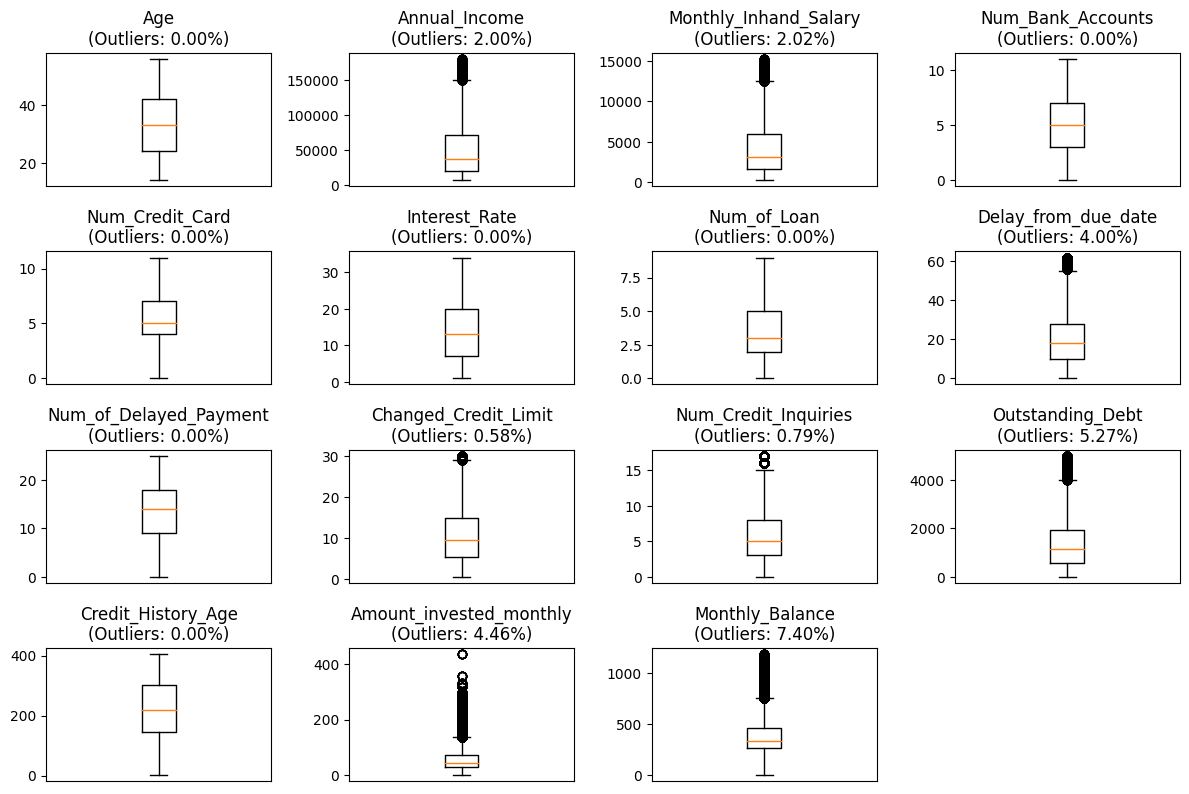

In [75]:
#boxplot before handling outliers
continuous_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt','Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance']

outlier_percentages = {}
for col in continuous_columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers_percentage = ((data[col] < lower_bound) | (data[col] > upper_bound)).mean() * 100
    outlier_percentages[col] = outliers_percentage

# Create subplots for each continuous column
plt.figure(figsize=(12, 10))
for i, col in enumerate(continuous_columns, start=1):
    plt.subplot(5, 4, i)
    plt.boxplot(data[col])
    plt.title(f'{col}\n(Outliers: {outlier_percentages[col]:.2f}%)')
    plt.xticks([])

plt.tight_layout()
plt.show()

Outliers present are genuine outliers so clipping them won't be good.

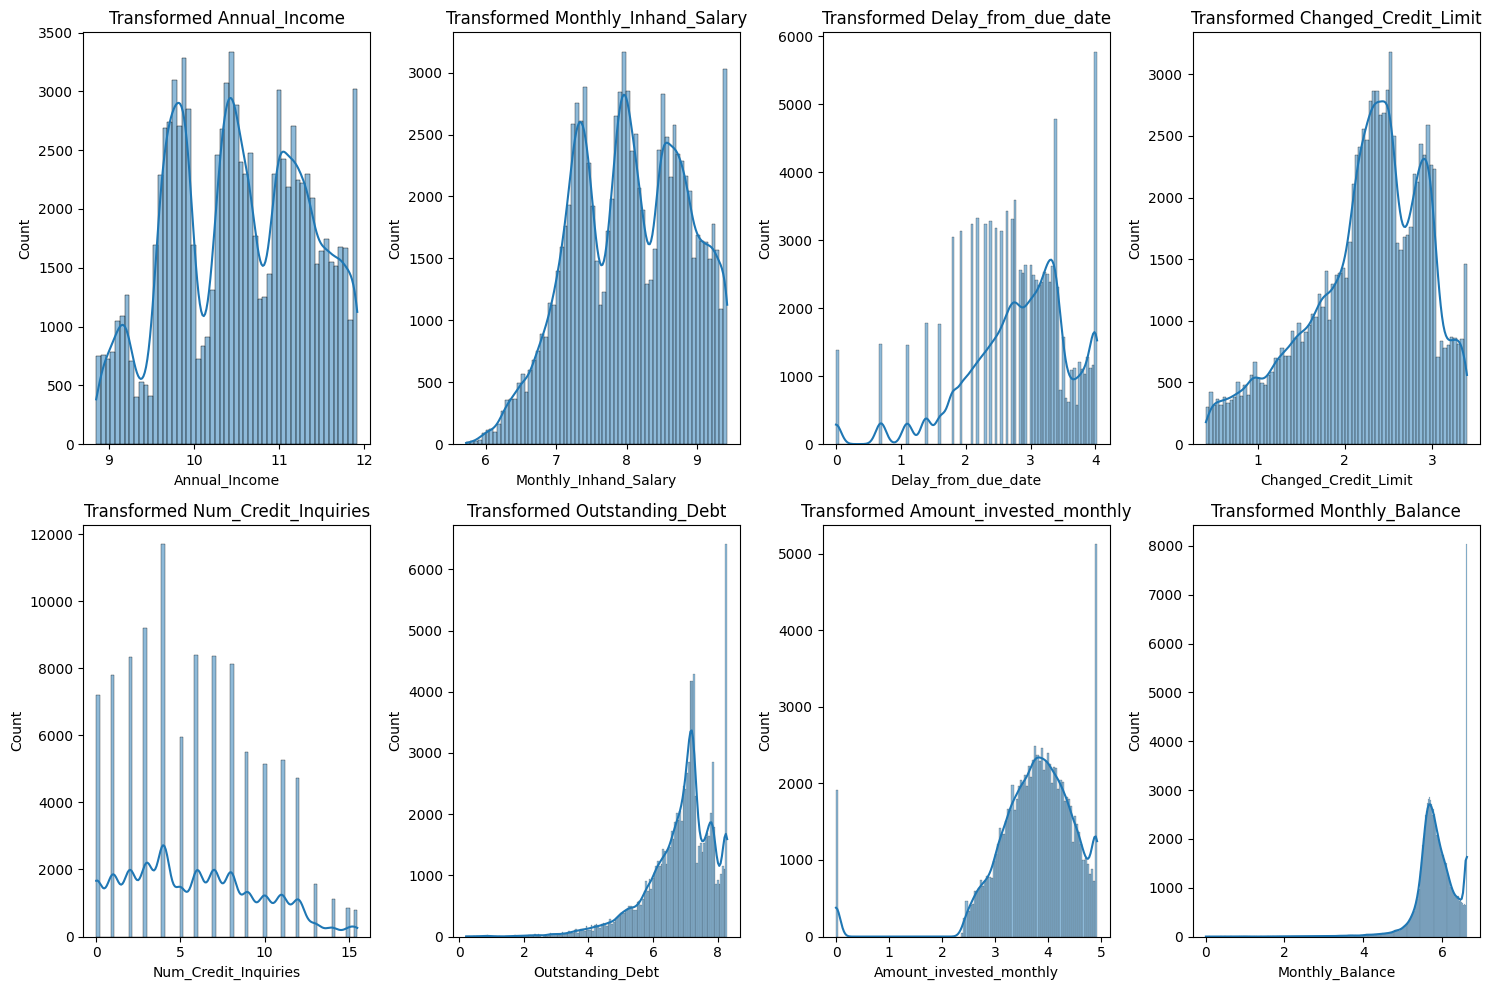

In [76]:
# Define a function to detect and handle outliers using IQR with multiple iterations
def handle_outliers_iqr(df, column, iterations=3, multiplier=1.5):
    for _ in range(iterations):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Apply outlier handling with multiple iterations
#outlier_columns = [
    'Annual_Income', 'Monthly_Inhand_Salary', 'Delay_from_due_date',
    'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt',
    'Amount_invested_monthly', 'Monthly_Balance'
#]

for col in outlier_columns:
    data = handle_outliers_iqr(data, col, iterations=3, multiplier=1.5)

# Apply transformations based on skewness
skewness = data[outlier_columns].skew()

# Log transformation for moderate positive skew
log_transform_cols = skewness[(skewness > 0.5) & (skewness <= 1.5)].index

# Box-Cox transformation for significant positive skew
box_cox_transform_cols = skewness[skewness > 1.5].index

# Reflect and log transformation for negative skew
reflect_log_transform_cols = skewness[skewness < -0.5].index

# Apply log transformation
for col in log_transform_cols:
    data[col] = np.log1p(data[col])

# Apply Box-Cox transformation
if box_cox_transform_cols.size > 0:
    pt = PowerTransformer(method='box-cox')
    data[box_cox_transform_cols] = pt.fit_transform(data[box_cox_transform_cols])

# Apply reflect and log transformation
for col in reflect_log_transform_cols:
    data[col] = np.log1p(data[col].max() - data[col])

# Plotting the transformed data
plt.figure(figsize=(15, 10))

for i, col in enumerate(outlier_columns):
    plt.subplot(2, 4, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Transformed {col}')

plt.tight_layout()
plt.show()

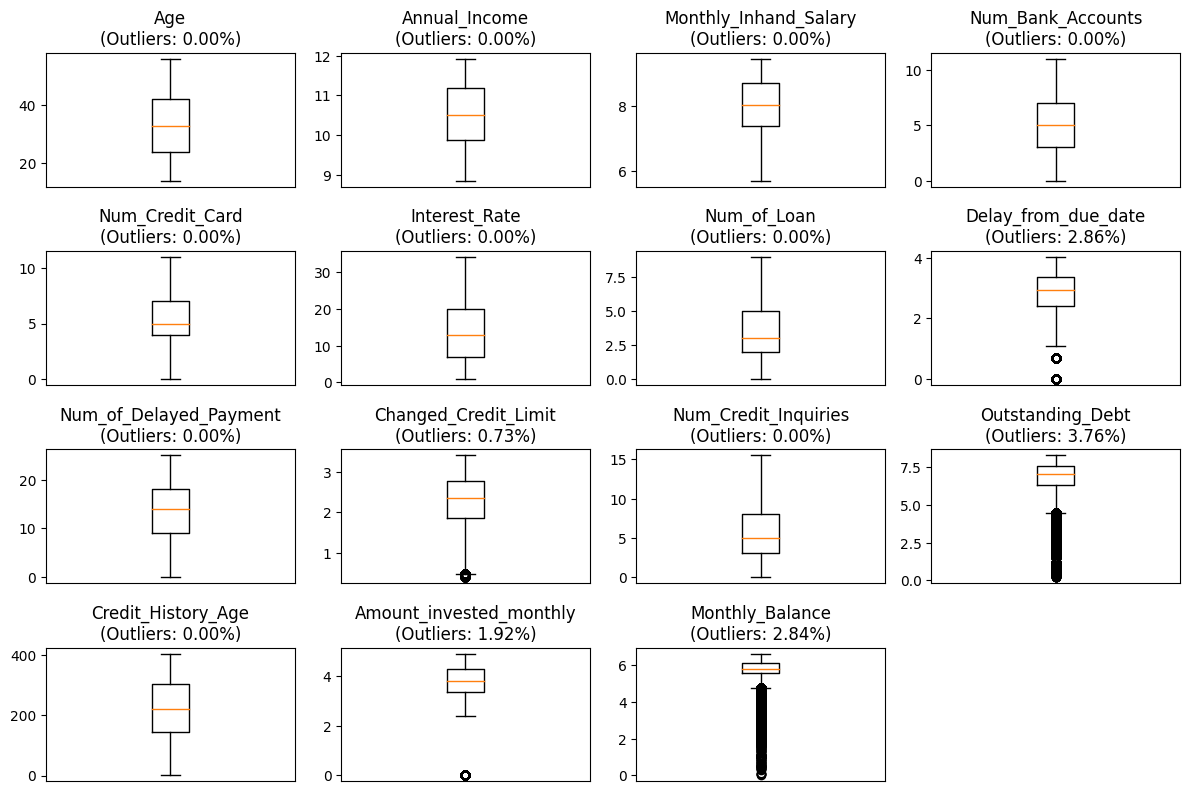

In [77]:
#boxplot after handling outliers
continuous_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt','Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance']

outlier_percentages = {}
for col in continuous_columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers_percentage = ((data[col] < lower_bound) | (data[col] > upper_bound)).mean() * 100
    outlier_percentages[col] = outliers_percentage

# Create subplots for each continuous column
plt.figure(figsize=(12, 10))
for i, col in enumerate(continuous_columns, start=1):
    plt.subplot(5, 4, i)
    plt.boxplot(data[col])
    plt.title(f'{col}\n(Outliers: {outlier_percentages[col]:.2f}%)')
    plt.xticks([])

plt.tight_layout()
plt.show()

Here Outliers are not completely removed but they have been decreased significantly.If the  the transformation is redone ,all the outliers will be eliminated,but doing so it would cause overfitting and loss of data integrity.so keeping it like this

**4.3 Encoding**

credit_mix and credit_score are ordinal categories, so I'll be replacing their categories with -1, 0, and 1, in order for them .Used mapping for payment behaviour and Payment of min amount as well.

In [78]:
# Define the mapping for ordinal categories
credit_mix_mapping = {'Bad': 0, 'Standard': 1, 'Good': 2}
credit_score_mapping = {'Poor': 0, 'Standard': 1, 'Good': 2}#for xgb

# Apply the mapping to the columns
data['Credit_Mix'] = data['Credit_Mix'].map(credit_mix_mapping)
data['Credit_Score'] = data['Credit_Score'].map(credit_score_mapping)



In [79]:
# Define the mapping dictionaries
payment_behaviour_labels = {
    'Low_spent_Small_value_payments': 0,
    'Low_spent_Medium_value_payments': 1,
    'Low_spent_Large_value_payments': 2,
    'High_spent_Small_value_payments': 3,
    'High_spent_Medium_value_payments': 4,
    'High_spent_Large_value_payments': 5
}

payment_of_min_amount_labels = {
    'Yes': 1,
    'No': -1,
    'NM': 0
}

# Map the 'Payment_Behaviour' column
data['Payment_Behaviour'] = data['Payment_Behaviour'].map(payment_behaviour_labels)
data['Payment_Behaviour'] = data['Payment_Behaviour'].astype('int64')

# Map the 'Payment_of_Min_Amount' column
data['Payment_of_Min_Amount'] = data['Payment_of_Min_Amount'].map(payment_of_min_amount_labels)
data['Payment_of_Min_Amount'] = data['Payment_of_Min_Amount'].astype('int64')

# Display the resulting DataFrame
print(data)

        Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      23.0       9.858235               7.509797                3.0   
1      23.0       9.858235               7.509797                3.0   
2      23.0       9.858235               7.509797                3.0   
3      23.0       9.858235               7.509797                3.0   
4      23.0       9.858235               7.509797                3.0   
...     ...            ...                    ...                ...   
99995  25.0      10.587341               8.119820                4.0   
99996  25.0      10.587341               8.119820                4.0   
99997  25.0      10.587341               8.119820                4.0   
99998  25.0      10.587341               8.119820                4.0   
99999  25.0      10.587341               8.119820                4.0   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                  4.0            3.0          4.0          

**4.4 Removing Highly correlated datas**

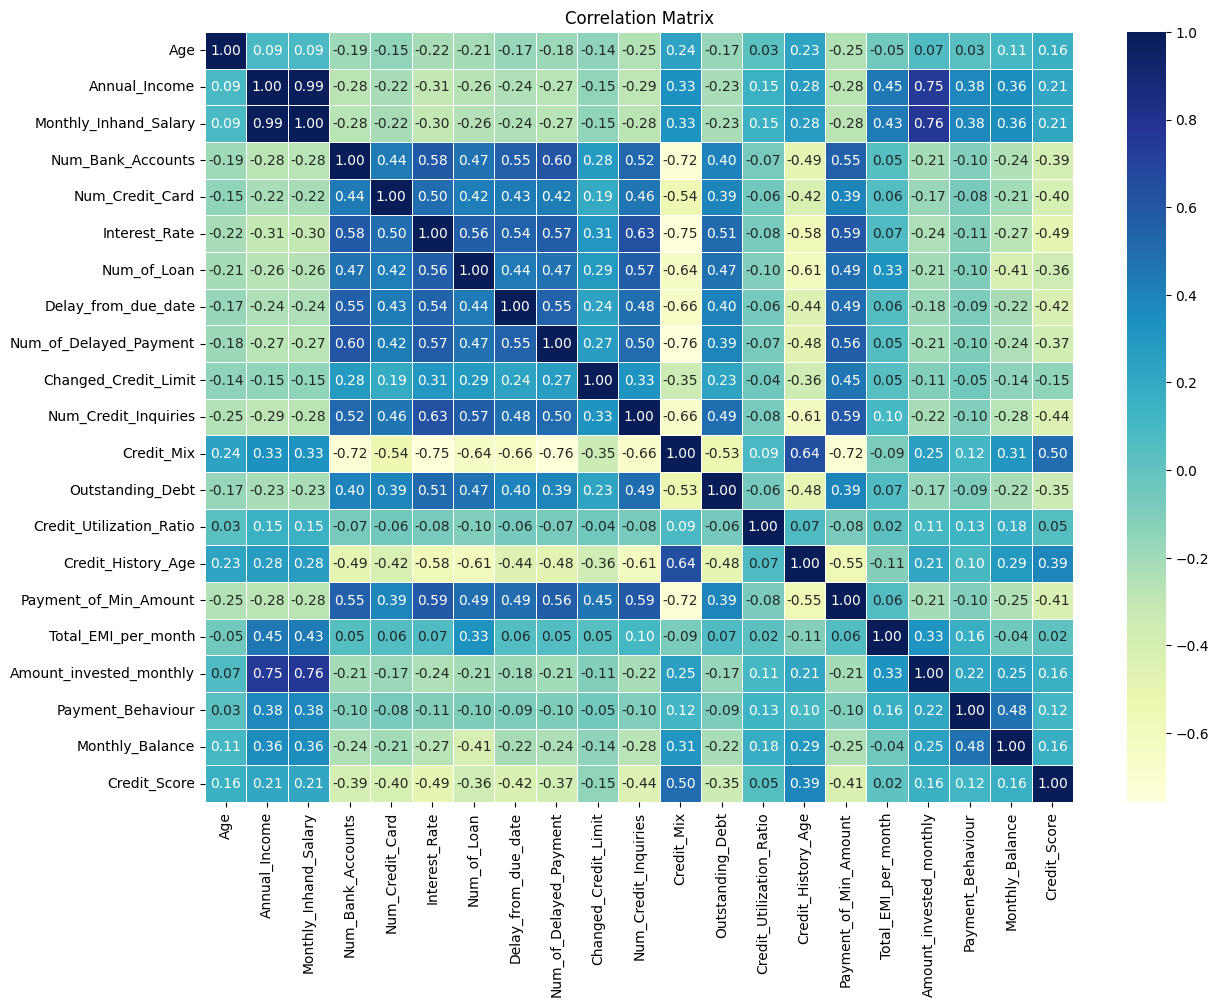

In [80]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [81]:
# Define the correlation threshold
correlation_threshold = 0.75

# Filter the correlation matrix to include only highly correlated pairs
highly_correlated = correlation_matrix[(correlation_matrix > correlation_threshold) & (correlation_matrix < 1)]

# Print highly correlated data
print("Highly Correlated Data:")
for col in highly_correlated:
    correlated_vars = highly_correlated[col][highly_correlated[col].notnull()]
    for idx, val in correlated_vars.items():
      print(f"{col} and {idx}: {val:.2f}")

Highly Correlated Data:
Annual_Income and Monthly_Inhand_Salary: 0.99
Monthly_Inhand_Salary and Annual_Income: 0.99
Monthly_Inhand_Salary and Amount_invested_monthly: 0.76
Amount_invested_monthly and Monthly_Inhand_Salary: 0.76


*We* can drop one of the highly correlated columns from each pair to avoid redundancy

In [82]:
# List of columns to drop
columns_to_drop = ['Monthly_Inhand_Salary', 'Amount_invested_monthly']

# Check if columns exist in the DataFrame
print("Columns before dropping:", data.columns.tolist())

# Drop the columns and save the result back to the 'data' DataFrame
data = data.drop(columns=columns_to_drop)

# Verify the columns have been dropped
print(f"Columns dropped: {columns_to_drop}")
print("Remaining columns:", data.columns.tolist())

Columns before dropping: ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']
Columns dropped: ['Monthly_Inhand_Salary', 'Amount_invested_monthly']
Remaining columns: ['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']


**5.Data Splitting**

In [84]:

#  Separate features and target variable
X = data.drop(columns=['Credit_Score'])
y = data['Credit_Score']

#  Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split training data into training and validation sets (70-30 split)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Print the shapes to verify the splits
print("Training set:")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print("\nValidation set:")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print("\nTesting set:")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


Training set:
X_train shape: (56000, 18), y_train shape: (56000,)

Validation set:
X_val shape: (24000, 18), y_val shape: (24000,)

Testing set:
X_test shape: (20000, 18), y_test shape: (20000,)


**6.Recursive Feature Elimination with Cross-Validation (RFECV)**

In [85]:

# Initialize the estimator with parallel processing
estimator = RandomForestClassifier(random_state=42, n_jobs=-1)

# Initialize RFECV with a larger step size and parallel processing
rfecv = RFECV(estimator=estimator, step=2, cv=5, scoring='accuracy', n_jobs=-1)

# Fit RFECV to the training data
rfecv.fit(X_train, y_train)

# Print the optimal number of features and their ranking
print("Optimal number of features: %d" % rfecv.n_features_)
print("Feature ranking: %s" % rfecv.ranking_)

# Transform the training and validation sets using the selected features
X_train_rfecv = rfecv.transform(X_train)
X_val_rfecv = rfecv.transform(X_val)

# Train the estimator using the selected features
estimator.fit(X_train_rfecv, y_train)

# Evaluate the estimator on the validation set
y_val_pred = estimator.predict(X_val_rfecv)
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy: %.2f%%" % (accuracy * 100))

Optimal number of features: 16
Feature ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1]
Validation Accuracy: 79.89%


In [86]:
# Get the mask of selected features
selected_features_mask = rfecv.support_

# Get the names of the selected features
selected_features = X_train.columns[selected_features_mask]
print("Selected features: %s" % selected_features)

Selected features: Index(['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Monthly_Balance'],
      dtype='object')


**7.MODEL BUILDING**

Chose robust methods that is not much susceptible outliers and scaling such as Randomforest,Decision Tree,Gradient Boosting.There is a moderate class imbalance in dataset so went for models like Xgb and Lgb which are not much susceptible to class imbalance.

In [89]:
import mlflow
import mlflow.sklearn
import mlflow.xgboost
import mlflow.lightgbm

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import xgboost as xgb
import lightgbm as lgb

# Initialize models
models = {
    'RandomForest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42)
}

# Start a single MLflow run
with mlflow.start_run() as run:
    for name, model in models.items():
        # Train the model
        model.fit(X_train_rfecv, y_train)

        # Predict and evaluate
        y_val_pred = model.predict(X_val_rfecv)
        accuracy = accuracy_score(y_val, y_val_pred)
        precision = precision_score(y_val, y_val_pred, average='weighted')
        recall = recall_score(y_val, y_val_pred, average='weighted')
        f1 = f1_score(y_val, y_val_pred, average='weighted')
        conf_matrix = confusion_matrix(y_val, y_val_pred)

        # Log metrics
        mlflow.log_param(f"{name}_model", str(model))
        mlflow.log_metric(f"{name}_accuracy", accuracy)
        mlflow.log_metric(f"{name}_precision", precision)
        mlflow.log_metric(f"{name}_recall", recall)
        mlflow.log_metric(f"{name}_f1", f1)

        # Create and log confusion matrix
        conf_matrix_file = f"confusion_matrix_{name}.txt"
        with open(conf_matrix_file, "w") as f:
            f.write(str(conf_matrix))

        mlflow.log_artifact(conf_matrix_file)

        # Log models
        if name in ['RandomForest', 'DecisionTree', 'GradientBoosting']:
            mlflow.sklearn.log_model(model, name)
        elif name == 'XGBoost':
            mlflow.xgboost.log_model(model, name)
        elif name == 'LightGBM':
            mlflow.lightgbm.log_model(model, name)

        print(f"{name} - Validation Accuracy: {accuracy:.2f}%")
        print(f"{name} - Precision: {precision:.2f}")
        print(f"{name} - Recall: {recall:.2f}")
        print(f"{name} - F1 Score: {f1:.2f}")
        print(f"{name} - Confusion Matrix:\n{conf_matrix}")


RandomForest - Validation Accuracy: 0.80%
RandomForest - Precision: 0.80
RandomForest - Recall: 0.80
RandomForest - F1 Score: 0.80
RandomForest - Confusion Matrix:
[[ 5665  1175    55]
 [ 1557 10343   994]
 [   33  1012  3166]]
DecisionTree - Validation Accuracy: 0.73%
DecisionTree - Precision: 0.73
DecisionTree - Recall: 0.73
DecisionTree - F1 Score: 0.73
DecisionTree - Confusion Matrix:
[[4956 1810  129]
 [1849 9723 1322]
 [ 132 1274 2805]]
GradientBoosting - Validation Accuracy: 0.71%
GradientBoosting - Precision: 0.72
GradientBoosting - Recall: 0.71
GradientBoosting - F1 Score: 0.71
GradientBoosting - Confusion Matrix:
[[4468 1887  540]
 [1563 9601 1730]
 [  93 1113 3005]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:25:10] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


XGBoost - Validation Accuracy: 0.76%
XGBoost - Precision: 0.76
XGBoost - Recall: 0.76
XGBoost - F1 Score: 0.76
XGBoost - Confusion Matrix:
[[ 5118  1515   262]
 [ 1611 10031  1252]
 [   60  1132  3019]]
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1994
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 16
[LightGBM] [Info] Start training from score -1.238552
[LightGBM] [Info] Start training from score -0.634845
[LightGBM] [Info] Start training from score -1.713807
LightGBM - Validation Accuracy: 0.74%
LightGBM - Precision: 0.74
LightGBM - Recall: 0.74
LightGBM - F1 Score: 0.74
LightGBM - Confusion Matrix:
[[4784 1717  394]
 [1567 9813 1514]
 [  75 1039 3097]]


In [90]:
mlflow.end_run()

Tried out SMOTE and Robust SCaling effect on models.

In [91]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import mlflow
import mlflow.sklearn
import mlflow.xgboost
import mlflow.lightgbm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb


# Apply SMOTE to balance the target variable in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Apply Robust Scaling to the resampled training set and the validation set
scaler = RobustScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)

# Initialize models
models = {
    'RandomForest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42)
}

# Start a single MLflow run
with mlflow.start_run() as run:
    for name, model in models.items():
        # Train the model
        model.fit(X_train_resampled_scaled, y_train_resampled)

        # Predict and evaluate
        y_val_pred = model.predict(X_val_scaled)
        accuracy = accuracy_score(y_val, y_val_pred)
        precision = precision_score(y_val, y_val_pred, average='weighted')
        recall = recall_score(y_val, y_val_pred, average='weighted')
        f1 = f1_score(y_val, y_val_pred, average='weighted')
        conf_matrix = confusion_matrix(y_val, y_val_pred)

        # Log metrics
        mlflow.log_param(f"{name}_model", str(model))
        mlflow.log_metric(f"{name}_accuracy", accuracy)
        mlflow.log_metric(f"{name}_precision", precision)
        mlflow.log_metric(f"{name}_recall", recall)
        mlflow.log_metric(f"{name}_f1", f1)

        # Create and log confusion matrix
        conf_matrix_file = f"confusion_matrix_{name}.txt"
        with open(conf_matrix_file, "w") as f:
            f.write(str(conf_matrix))

        mlflow.log_artifact(conf_matrix_file)

        # Log models
        if name in ['RandomForest', 'DecisionTree', 'GradientBoosting']:
            mlflow.sklearn.log_model(model, name)
        elif name == 'XGBoost':
            mlflow.xgboost.log_model(model, name)
        elif name == 'LightGBM':
            mlflow.lightgbm.log_model(model, name)

        print(f"{name} - Validation Accuracy: {accuracy:.2f}%")
        print(f"{name} - Precision: {precision:.2f}")
        print(f"{name} - Recall: {recall:.2f}")
        print(f"{name} - F1 Score: {f1:.2f}")
        print(f"{name} - Confusion Matrix:\n{conf_matrix}")


RandomForest - Validation Accuracy: 0.79%
RandomForest - Precision: 0.80
RandomForest - Recall: 0.79
RandomForest - F1 Score: 0.79
RandomForest - Confusion Matrix:
[[5745  992  158]
 [1664 9913 1317]
 [  39  833 3339]]
DecisionTree - Validation Accuracy: 0.71%
DecisionTree - Precision: 0.71
DecisionTree - Recall: 0.71
DecisionTree - F1 Score: 0.71
DecisionTree - Confusion Matrix:
[[4912 1810  173]
 [2048 9313 1533]
 [ 186 1220 2805]]
GradientBoosting - Validation Accuracy: 0.69%
GradientBoosting - Precision: 0.73
GradientBoosting - Recall: 0.69
GradientBoosting - F1 Score: 0.70
GradientBoosting - Confusion Matrix:
[[5132  984  779]
 [2391 8112 2391]
 [ 117  670 3424]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:35:03] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


XGBoost - Validation Accuracy: 0.75%
XGBoost - Precision: 0.76
XGBoost - Recall: 0.75
XGBoost - F1 Score: 0.75
XGBoost - Confusion Matrix:
[[5294 1221  380]
 [1854 9321 1719]
 [  66  860 3285]]
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032335 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3835
[LightGBM] [Info] Number of data points in the train set: 89043, number of used features: 18
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
LightGBM - Validation Accuracy: 0.72%
LightGBM - Precision: 0.74
LightGBM - Recall: 0.72
LightGBM - F1 Score: 0.73
LightGBM - Confusion Matrix:
[[5158 1155  582]
 [2018 8774 2102]
 [  95  726 3390]]


In [92]:
mlflow.end_run()

Tried out undersampling for majority class and Robust SCaling effect on models.

In [93]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import mlflow
import mlflow.sklearn
import mlflow.xgboost
import mlflow.lightgbm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb


# Undersample the majority class in the training set
under_sampler = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = under_sampler.fit_resample(X_train, y_train)

# Apply Robust Scaling to the undersampled training set and the validation set
scaler = RobustScaler()
X_train_undersampled_scaled = scaler.fit_transform(X_train_undersampled)
X_val_scaled = scaler.transform(X_val)

# Initialize models
models = {
    'RandomForest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42)
}

# Start a single MLflow run
with mlflow.start_run() as run:
    for name, model in models.items():
        # Train the model
        model.fit(X_train_undersampled_scaled, y_train_undersampled)

        # Predict and evaluate
        y_val_pred = model.predict(X_val_scaled)
        accuracy = accuracy_score(y_val, y_val_pred)
        precision = precision_score(y_val, y_val_pred, average='weighted')
        recall = recall_score(y_val, y_val_pred, average='weighted')
        f1 = f1_score(y_val, y_val_pred, average='weighted')
        conf_matrix = confusion_matrix(y_val, y_val_pred)

        # Log metrics
        mlflow.log_param(f"{name}_model", str(model))
        mlflow.log_metric(f"{name}_accuracy", accuracy)
        mlflow.log_metric(f"{name}_precision", precision)
        mlflow.log_metric(f"{name}_recall", recall)
        mlflow.log_metric(f"{name}_f1", f1)

        # Create and log confusion matrix
        conf_matrix_file = f"confusion_matrix_{name}.txt"
        with open(conf_matrix_file, "w") as f:
            f.write(str(conf_matrix))

        mlflow.log_artifact(conf_matrix_file)

        # Log models
        if name in ['RandomForest', 'DecisionTree', 'GradientBoosting']:
            mlflow.sklearn.log_model(model, name)
        elif name == 'XGBoost':
            mlflow.xgboost.log_model(model, name)
        elif name == 'LightGBM':
            mlflow.lightgbm.log_model(model, name)

        print(f"{name} - Validation Accuracy: {accuracy:.2f}%")
        print(f"{name} - Precision: {precision:.2f}")
        print(f"{name} - Recall: {recall:.2f}")
        print(f"{name} - F1 Score: {f1:.2f}")
        print(f"{name} - Confusion Matrix:\n{conf_matrix}")


RandomForest - Validation Accuracy: 0.76%
RandomForest - Precision: 0.79
RandomForest - Recall: 0.76
RandomForest - F1 Score: 0.76
RandomForest - Confusion Matrix:
[[5797  739  359]
 [2122 8714 2058]
 [  61  491 3659]]
DecisionTree - Validation Accuracy: 0.67%
DecisionTree - Precision: 0.70
DecisionTree - Recall: 0.67
DecisionTree - F1 Score: 0.67
DecisionTree - Confusion Matrix:
[[5089 1471  335]
 [2686 7771 2437]
 [ 200  725 3286]]
GradientBoosting - Validation Accuracy: 0.69%
GradientBoosting - Precision: 0.74
GradientBoosting - Recall: 0.69
GradientBoosting - F1 Score: 0.69
GradientBoosting - Confusion Matrix:
[[5226  754  915]
 [2569 7679 2646]
 [  85  543 3583]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:46:50] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


XGBoost - Validation Accuracy: 0.73%
XGBoost - Precision: 0.76
XGBoost - Recall: 0.73
XGBoost - F1 Score: 0.73
XGBoost - Confusion Matrix:
[[5471  858  566]
 [2229 8339 2326]
 [  79  500 3632]]
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006521 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2001
[LightGBM] [Info] Number of data points in the train set: 30270, number of used features: 18
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
LightGBM - Validation Accuracy: 0.71%
LightGBM - Precision: 0.75
LightGBM - Recall: 0.71
LightGBM - F1 Score: 0.71
LightGBM - Confusion Matrix:
[[5345  814  736]
 [2410 7997 2487]
 [  94  524 3593]]


In [94]:
mlflow.end_run()

Across every scenarios,Random Forest emerged as a good choice followed by Xgb and Lgb.Also class balancing methods didn't helped in accuracy.So went with the models which gave  good metrics for hypertuning .